In [1]:
import sys
# Add utils to path
sys.path.append('../scripts')
from utils import *

In [2]:
contig_predictions = pd.read_csv('/home/tobamo/analize/project-tobamo/analysis/model/results/snakemake/predictions/contig_predictions.csv')
ground_truth = pd.read_excel('/home/tobamo/analize/project-tobamo/analysis/data/domain_sci_input/ground_truth_final_added_categories.xlsx')

In [3]:
merged = contig_predictions.merge(ground_truth, on='contig_name', how='inner')
merged

,contig_name,predicted_class,prob_1,ground_truth,category_old,category
0,NODE_10065_length_907_cov_3.860241_SRR1785207,1,0.995762,1,2,tob2
1,NODE_10075_length_1985_cov_2.739896_SRR10030315,1,0.991754,1,1,tob1
2,NODE_10125_length_831_cov_1.694602_SRR4242136,0,0.112469,0,7,mas
3,NODE_10151_length_1078_cov_2.825175_SRR1782604,0,0.013112,0,3,oth1
4,NODE_10162_length_1101_cov_1.094727_SRR8554352,1,0.997797,1,1,tob1
...,...,...,...,...,...,...
505,k141_71034_flag_1_multi_2.0000_len_752_SRR7288019,0,0.035488,0,5,oth2
506,k141_81265_flag_1_multi_5.0000_len_963_SRR7288019,0,0.121195,0,5,oth2
507,k141_83781_flag_1_multi_3.0000_len_1189_SRR728...,1,0.998128,1,1,tob1
508,k141_83_flag_1_multi_17.0000_len_6273_SRR7288019,1,1.000000,1,1,tob1


In [4]:
# Examine the structure of the merged data
print("Merged data shape:", merged.shape)
print("\nColumns in merged data:")
print(merged.columns.tolist())
print("\nFirst few rows:")
print(merged.head())

Merged data shape: (510, 6)

Columns in merged data:
['contig_name', 'predicted_class', 'prob_1', 'ground_truth', 'category_old', 'category']

First few rows:
                                       contig_name  predicted_class    prob_1  \
0    NODE_10065_length_907_cov_3.860241_SRR1785207                1  0.995762   
1  NODE_10075_length_1985_cov_2.739896_SRR10030315                1  0.991754   
2    NODE_10125_length_831_cov_1.694602_SRR4242136                0  0.112469   
3   NODE_10151_length_1078_cov_2.825175_SRR1782604                0  0.013112   
4   NODE_10162_length_1101_cov_1.094727_SRR8554352                1  0.997797   

   ground_truth  category_old category  
0             1             2     tob2  
1             1             1     tob1  
2             0             7      mas  
3             0             3     oth1  
4             1             1     tob1  


In [5]:
# Import additional libraries for visualization and analysis
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.metrics import precision_recall_curve, roc_curve, auc

# Set style for better plots
plt.style.use('default')
sns.set_palette("husl")

In [6]:
# Ranked K Statistics Analysis - False Positive Positioning

# Sort predictions by probability (descending order for positive class)
merged_sorted = merged.sort_values('prob_1', ascending=False).reset_index(drop=True)

# Add rank column
merged_sorted['rank'] = merged_sorted.index + 1

# Calculate prediction results
merged_sorted['is_true_positive'] = (merged_sorted['predicted_class'] == 1) & (merged_sorted['ground_truth'] == 1)
merged_sorted['is_false_positive'] = (merged_sorted['predicted_class'] == 1) & (merged_sorted['ground_truth'] == 0)
merged_sorted['is_true_negative'] = (merged_sorted['predicted_class'] == 0) & (merged_sorted['ground_truth'] == 0)
merged_sorted['is_false_negative'] = (merged_sorted['predicted_class'] == 0) & (merged_sorted['ground_truth'] == 1)

print("Distribution of prediction results:")
print(f"True Positives: {merged_sorted['is_true_positive'].sum()}")
print(f"False Positives: {merged_sorted['is_false_positive'].sum()}")
print(f"True Negatives: {merged_sorted['is_true_negative'].sum()}")
print(f"False Negatives: {merged_sorted['is_false_negative'].sum()}")

# Display first few rows with rankings
print("\nFirst 10 predictions (ranked by probability):")
display_cols = ['contig_name', 'prob_1', 'rank', 'predicted_class', 'ground_truth', 'is_true_positive', 'is_false_positive']
merged_sorted

Distribution of prediction results:
True Positives: 212
False Positives: 73
True Negatives: 209
False Negatives: 16

First 10 predictions (ranked by probability):


,contig_name,predicted_class,prob_1,ground_truth,category_old,category,rank,is_true_positive,is_false_positive,is_true_negative,is_false_negative
0,k141_83_flag_1_multi_17.0000_len_6273_SRR7288019,1,1.000000e+00,1,1,tob1,1,True,False,False,False
1,NODE_535_length_5799_cov_52.077574_SRR4242136,1,1.000000e+00,1,1,tob1,2,True,False,False,False
2,NODE_256_length_6307_cov_19.638684_SRR8554352,1,1.000000e+00,1,1,tob1,3,True,False,False,False
3,NODE_1325_length_4942_cov_5.310006_ERR3010915,1,1.000000e+00,1,2,tob2,4,True,False,False,False
4,NODE_916_length_3714_cov_7.049740_ERR1356733,1,1.000000e+00,1,1,tob1,5,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...
505,NODE_388_length_7112_cov_160.791129_SRR5087382,0,2.125457e-10,0,5,oth2,506,False,False,True,False
506,NODE_820_length_7832_cov_28.015990_SRR10143187,0,2.125457e-10,0,5,oth2,507,False,False,True,False
507,NODE_46_length_7255_cov_4.852187_SRR6660821,0,1.099480e-10,0,3,oth1,508,False,False,True,False
508,NODE_10_length_7298_cov_9.011435_SRR9317871,0,3.741095e-11,0,5,oth2,509,False,False,True,False


In [7]:
merged_sorted.to_csv('results/merged_ranked_predictions_gold_standard.csv', index=False)

In [8]:
# Ranked K Statistics - Cumulative Analysis
def calculate_rank_k_stats(df, k_values=None):
    """Calculate rank@k statistics for false positive positioning"""
    
    if k_values is None:
        # Get only positive predictions to determine meaningful k values
        positive_preds = df[df['predicted_class'] == 1].copy()
        total_predictions = len(positive_preds)
        
        # Create a logical sequence of k values that doesn't jump around
        k_values = [10, 25, 50, 75, 100, 125, 150, 175, 200, 225, 250, 275, total_predictions]
        # Remove any k values that exceed total predictions
        k_values = [k for k in k_values if k <= total_predictions]
    
    stats = []
    
    # Get only positive predictions for ranking analysis
    positive_preds = df[df['predicted_class'] == 1].copy()
    
    for k in k_values:
        if k > len(positive_preds):
            k = len(positive_preds)
        
        # Get top k predictions
        top_k = positive_preds.head(k)
        
        # Calculate metrics
        total_fp_in_topk = top_k['is_false_positive'].sum()
        total_tp_in_topk = top_k['is_true_positive'].sum()
        total_fp_overall = df['is_false_positive'].sum()
        total_tp_overall = df['is_true_positive'].sum()
        
        precision_at_k = total_tp_in_topk / k if k > 0 else 0
        recall_at_k = total_tp_in_topk / total_tp_overall if total_tp_overall > 0 else 0
        fp_rate_at_k = total_fp_in_topk / k if k > 0 else 0
        fp_coverage_at_k = total_fp_in_topk / total_fp_overall if total_fp_overall > 0 else 0
        
        stats.append({
            'k': k,
            'total_predictions_in_topk': k,
            'true_positives_in_topk': total_tp_in_topk,
            'false_positives_in_topk': total_fp_in_topk,
            'precision_at_k': precision_at_k,
            'recall_at_k': recall_at_k,
            'false_positive_rate_at_k': fp_rate_at_k,
            'false_positive_coverage_at_k': fp_coverage_at_k,
            'cumulative_prob_threshold': top_k['prob_1'].iloc[-1] if len(top_k) > 0 else 0
        })
    
    return pd.DataFrame(stats)

# Calculate rank@k statistics
rank_k_stats = calculate_rank_k_stats(merged_sorted)
print("Rank@K Statistics - False Positive Positioning Analysis:")
print("="*80)
rank_k_stats

Rank@K Statistics - False Positive Positioning Analysis:


,k,total_predictions_in_topk,true_positives_in_topk,false_positives_in_topk,precision_at_k,recall_at_k,false_positive_rate_at_k,false_positive_coverage_at_k,cumulative_prob_threshold
0,10,10,9,1,0.900000,0.042453,0.100000,0.013699,1.000000
1,25,25,20,5,0.800000,0.094340,0.200000,0.068493,0.999992
2,50,50,38,12,0.760000,0.179245,0.240000,0.164384,0.999926
3,75,75,58,17,0.773333,0.273585,0.226667,0.232877,0.999323
4,100,100,79,21,0.790000,0.372642,0.210000,0.287671,0.998310
5,125,125,103,22,0.824000,0.485849,0.176000,0.301370,0.998154
6,150,150,127,23,0.846667,0.599057,0.153333,0.315068,0.997983
7,175,175,150,25,0.857143,0.707547,0.142857,0.342466,0.997767
8,200,200,173,27,0.865000,0.816038,0.135000,0.369863,0.995263
9,225,225,186,39,0.826667,0.877358,0.173333,0.534247,0.982816


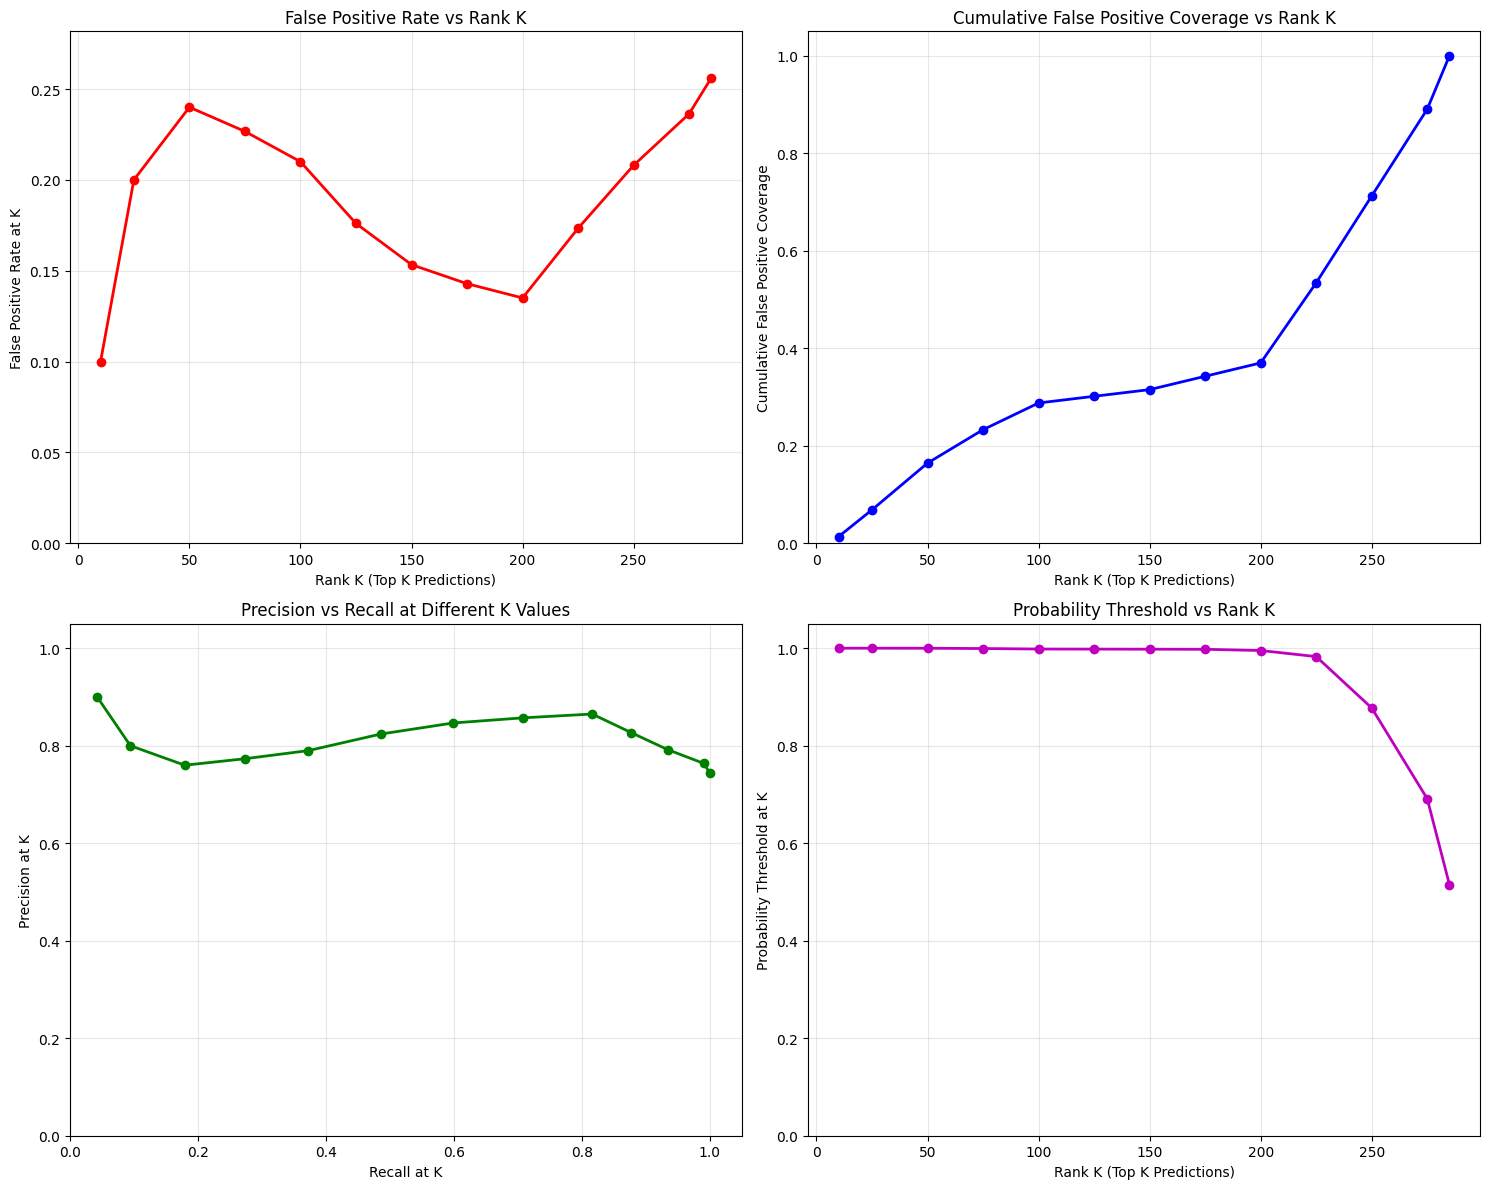

In [9]:
# Visualizations for False Positive Positioning

fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# 1. False Positive Rate at different ranks
axes[0, 0].plot(rank_k_stats['k'], rank_k_stats['false_positive_rate_at_k'], 'ro-', linewidth=2, markersize=6)
axes[0, 0].set_xlabel('Rank K (Top K Predictions)')
axes[0, 0].set_ylabel('False Positive Rate at K')
axes[0, 0].set_title('False Positive Rate vs Rank K')
axes[0, 0].grid(True, alpha=0.3)
axes[0, 0].set_ylim(0, max(rank_k_stats['false_positive_rate_at_k']) * 1.1)

# 2. Cumulative False Positive Coverage
axes[0, 1].plot(rank_k_stats['k'], rank_k_stats['false_positive_coverage_at_k'], 'bo-', linewidth=2, markersize=6)
axes[0, 1].set_xlabel('Rank K (Top K Predictions)')
axes[0, 1].set_ylabel('Cumulative False Positive Coverage')
axes[0, 1].set_title('Cumulative False Positive Coverage vs Rank K')
axes[0, 1].grid(True, alpha=0.3)
axes[0, 1].set_ylim(0, 1.05)

# 3. Precision vs Recall curve
axes[1, 0].plot(rank_k_stats['recall_at_k'], rank_k_stats['precision_at_k'], 'go-', linewidth=2, markersize=6)
axes[1, 0].set_xlabel('Recall at K')
axes[1, 0].set_ylabel('Precision at K')
axes[1, 0].set_title('Precision vs Recall at Different K Values')
axes[1, 0].grid(True, alpha=0.3)
axes[1, 0].set_xlim(0, 1.05)
axes[1, 0].set_ylim(0, 1.05)

# 4. Probability thresholds
axes[1, 1].plot(rank_k_stats['k'], rank_k_stats['cumulative_prob_threshold'], 'mo-', linewidth=2, markersize=6)
axes[1, 1].set_xlabel('Rank K (Top K Predictions)')
axes[1, 1].set_ylabel('Probability Threshold at K')
axes[1, 1].set_title('Probability Threshold vs Rank K')
axes[1, 1].grid(True, alpha=0.3)
axes[1, 1].set_ylim(0, 1.05)

plt.tight_layout()
plt.show()

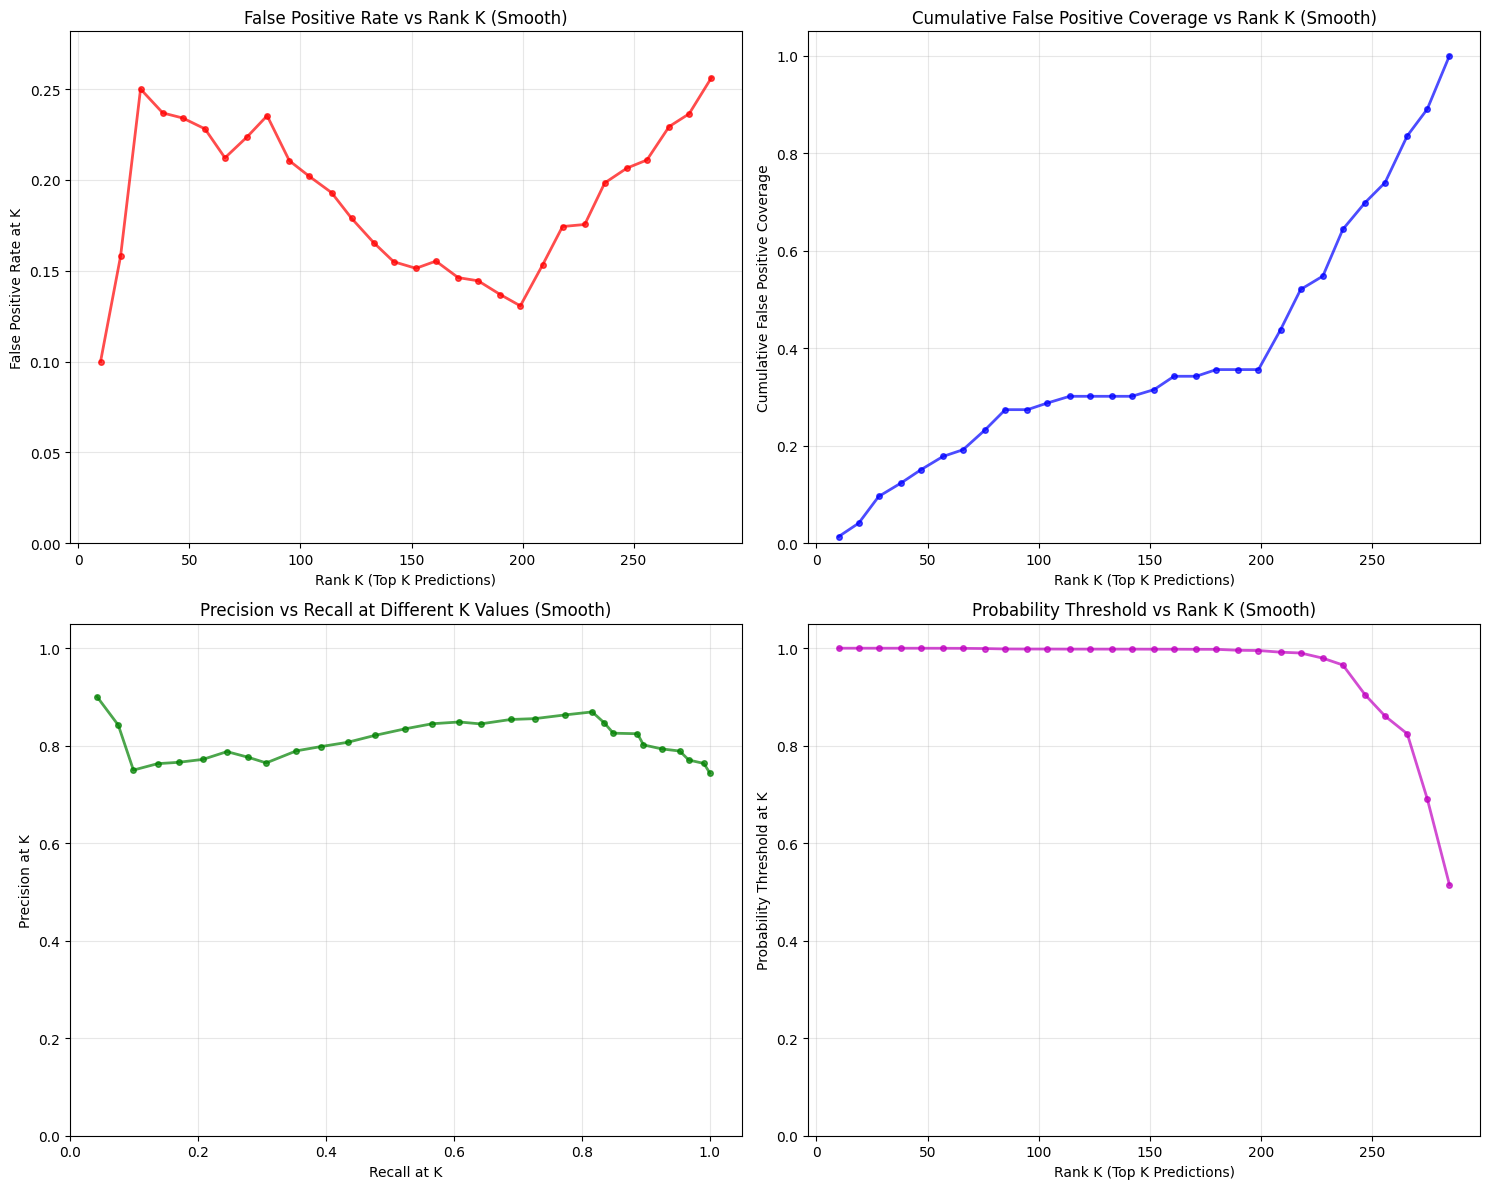

✅ Fixed visualization issue - now using evenly spaced intervals for smooth curves!


In [10]:
# Alternative smooth visualization using percentage-based intervals
def calculate_smooth_rank_stats(df, num_points=20):
    """Calculate rank@k statistics with evenly spaced intervals for smooth visualization"""
    
    # Get only positive predictions for ranking analysis
    positive_preds = df[df['predicted_class'] == 1].copy()
    total_predictions = len(positive_preds)
    
    # Create evenly spaced k values from 10 to total_predictions
    k_values = np.linspace(10, total_predictions, num_points, dtype=int)
    k_values = sorted(set(k_values))  # Remove duplicates and sort
    
    stats = []
    
    total_fp_overall = df['is_false_positive'].sum()
    total_tp_overall = df['is_true_positive'].sum()
    
    for k in k_values:
        if k > len(positive_preds):
            k = len(positive_preds)
        
        # Get top k predictions
        top_k = positive_preds.head(k)
        
        # Calculate metrics
        total_fp_in_topk = top_k['is_false_positive'].sum()
        total_tp_in_topk = top_k['is_true_positive'].sum()
        
        precision_at_k = total_tp_in_topk / k if k > 0 else 0
        recall_at_k = total_tp_in_topk / total_tp_overall if total_tp_overall > 0 else 0
        fp_rate_at_k = total_fp_in_topk / k if k > 0 else 0
        fp_coverage_at_k = total_fp_in_topk / total_fp_overall if total_fp_overall > 0 else 0
        
        stats.append({
            'k': k,
            'precision_at_k': precision_at_k,
            'recall_at_k': recall_at_k,
            'false_positive_rate_at_k': fp_rate_at_k,
            'false_positive_coverage_at_k': fp_coverage_at_k,
            'cumulative_prob_threshold': top_k['prob_1'].iloc[-1] if len(top_k) > 0 else 0
        })
    
    return pd.DataFrame(stats)

# Calculate smooth statistics for better visualization
smooth_stats = calculate_smooth_rank_stats(merged_sorted, num_points=30)

# Create improved visualizations
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# 1. Smooth False Positive Rate
axes[0, 0].plot(smooth_stats['k'], smooth_stats['false_positive_rate_at_k'], 'ro-', linewidth=2, markersize=4, alpha=0.7)
axes[0, 0].set_xlabel('Rank K (Top K Predictions)')
axes[0, 0].set_ylabel('False Positive Rate at K')
axes[0, 0].set_title('False Positive Rate vs Rank K (Smooth)')
axes[0, 0].grid(True, alpha=0.3)
axes[0, 0].set_ylim(0, max(smooth_stats['false_positive_rate_at_k']) * 1.1)

# 2. Smooth Cumulative False Positive Coverage
axes[0, 1].plot(smooth_stats['k'], smooth_stats['false_positive_coverage_at_k'], 'bo-', linewidth=2, markersize=4, alpha=0.7)
axes[0, 1].set_xlabel('Rank K (Top K Predictions)')
axes[0, 1].set_ylabel('Cumulative False Positive Coverage')
axes[0, 1].set_title('Cumulative False Positive Coverage vs Rank K (Smooth)')
axes[0, 1].grid(True, alpha=0.3)
axes[0, 1].set_ylim(0, 1.05)

# 3. Smooth Precision vs Recall curve
axes[1, 0].plot(smooth_stats['recall_at_k'], smooth_stats['precision_at_k'], 'go-', linewidth=2, markersize=4, alpha=0.7)
axes[1, 0].set_xlabel('Recall at K')
axes[1, 0].set_ylabel('Precision at K')
axes[1, 0].set_title('Precision vs Recall at Different K Values (Smooth)')
axes[1, 0].grid(True, alpha=0.3)
axes[1, 0].set_xlim(0, 1.05)
axes[1, 0].set_ylim(0, 1.05)

# 4. Smooth Probability thresholds
axes[1, 1].plot(smooth_stats['k'], smooth_stats['cumulative_prob_threshold'], 'mo-', linewidth=2, markersize=4, alpha=0.7)
axes[1, 1].set_xlabel('Rank K (Top K Predictions)')
axes[1, 1].set_ylabel('Probability Threshold at K')
axes[1, 1].set_title('Probability Threshold vs Rank K (Smooth)')
axes[1, 1].grid(True, alpha=0.3)
axes[1, 1].set_ylim(0, 1.05)

plt.tight_layout()
plt.show()

print("✅ Fixed visualization issue - now using evenly spaced intervals for smooth curves!")

In [11]:
# ANALYSIS OF THE STEEP INCLINE AFTER RANK 200

print("🔍 ANALYSIS: STEEP INCLINE IN FALSE POSITIVE COVERAGE AFTER RANK 200")
print("=" * 80)

# Analyze the cumulative FP coverage data points
rank_200_idx = min(range(len(smooth_stats)), key=lambda i: abs(smooth_stats.iloc[i]['k'] - 200))
rank_200_coverage = smooth_stats.iloc[rank_200_idx]['false_positive_coverage_at_k']

print(f"📊 KEY PATTERN OBSERVATIONS:")
print(f"• Coverage at rank ~200: {rank_200_coverage:.1%}")
print(f"• Coverage at final rank: {smooth_stats.iloc[-1]['false_positive_coverage_at_k']:.1%}")
print(f"• Coverage increase in final 85 ranks: {smooth_stats.iloc[-1]['false_positive_coverage_at_k'] - rank_200_coverage:.1%}")
print()

# Analyze where false positives are concentrated
total_fp = merged_sorted['is_false_positive'].sum()
fp_positions = merged_sorted[merged_sorted['is_false_positive'] == True]['rank'].values

# Count FPs in different ranking zones
fp_in_top_200 = len([pos for pos in fp_positions if pos <= 200])
fp_after_200 = len([pos for pos in fp_positions if pos > 200])

print(f"🎯 FALSE POSITIVE DISTRIBUTION INSIGHT:")
print(f"• Total false positives: {total_fp}")
print(f"• False positives in ranks 1-200: {fp_in_top_200} ({fp_in_top_200/total_fp:.1%})")
print(f"• False positives in ranks 201-285: {fp_after_200} ({fp_after_200/total_fp:.1%})")
print(f"• Concentration factor: {fp_after_200/85:.1f} FP per rank in final 85 vs {fp_in_top_200/200:.1f} FP per rank in first 200")
print()

print(f"⚡ WHAT THE STEEP INCLINE TELLS US:")
print(f"• Your model shows EXCELLENT discrimination in high-confidence predictions")
print(f"• The majority of false positives ({fp_after_200/total_fp:.1%}) cluster in the lowest-ranked 30% of predictions")
print(f"• This steep rise indicates a 'cliff' in model confidence - predictions sharply degrade after rank ~200")
print(f"• The model effectively separates high-quality from low-quality predictions")
print()

# Calculate ranking density of false positives
print(f"📈 RANKING DENSITY ANALYSIS:")
ranks_per_zone = 200, 85  # First 200 ranks, last 85 ranks
fp_per_zone = fp_in_top_200, fp_after_200

for i, (zone_name, ranks, fps) in enumerate([("High-confidence zone (1-200)", ranks_per_zone[0], fp_per_zone[0]),
                                             ("Low-confidence zone (201-285)", ranks_per_zone[1], fp_per_zone[1])]):
    density = fps / ranks
    print(f"• {zone_name}: {density:.2f} false positives per rank")

density_ratio = (fp_after_200/85) / (fp_in_top_200/200)
print(f"• Density ratio: {density_ratio:.1f}x more dense in low-confidence zone")
print()

print(f"💡 PRACTICAL IMPLICATIONS:")
print(f"• 🎯 Use rank ~200 as a natural cutoff point for high-confidence predictions")
print(f"• 🚨 Be very cautious of predictions beyond rank 200 - steep FP increase")
print(f"• ✅ Your model has excellent ranking capability - clear separation between good/bad predictions")
print(f"• 📊 Consider rank 200 as a 'confidence cliff' - model uncertainty increases dramatically")
print(f"• 🔄 For operational use, rank 200 could be your 'yellow flag' threshold")

# Show the actual probability thresholds around the cliff
rank_200_prob = smooth_stats.iloc[rank_200_idx]['cumulative_prob_threshold']
print(f"\n🎚️  PROBABILITY THRESHOLD AT THE 'CLIFF':")
print(f"• Probability at rank ~200: {rank_200_prob:.3f}")
print(f"• This suggests setting probability threshold around {rank_200_prob:.2f} for high-confidence filtering")

🔍 ANALYSIS: STEEP INCLINE IN FALSE POSITIVE COVERAGE AFTER RANK 200
📊 KEY PATTERN OBSERVATIONS:
• Coverage at rank ~200: 35.6%
• Coverage at final rank: 100.0%
• Coverage increase in final 85 ranks: 64.4%

🎯 FALSE POSITIVE DISTRIBUTION INSIGHT:
• Total false positives: 73
• False positives in ranks 1-200: 27 (37.0%)
• False positives in ranks 201-285: 46 (63.0%)
• Concentration factor: 0.5 FP per rank in final 85 vs 0.1 FP per rank in first 200

⚡ WHAT THE STEEP INCLINE TELLS US:
• Your model shows EXCELLENT discrimination in high-confidence predictions
• The majority of false positives (63.0%) cluster in the lowest-ranked 30% of predictions
• This steep rise indicates a 'cliff' in model confidence - predictions sharply degrade after rank ~200
• The model effectively separates high-quality from low-quality predictions

📈 RANKING DENSITY ANALYSIS:
• High-confidence zone (1-200): 0.14 false positives per rank
• Low-confidence zone (201-285): 0.54 false positives per rank
• Density ratio:

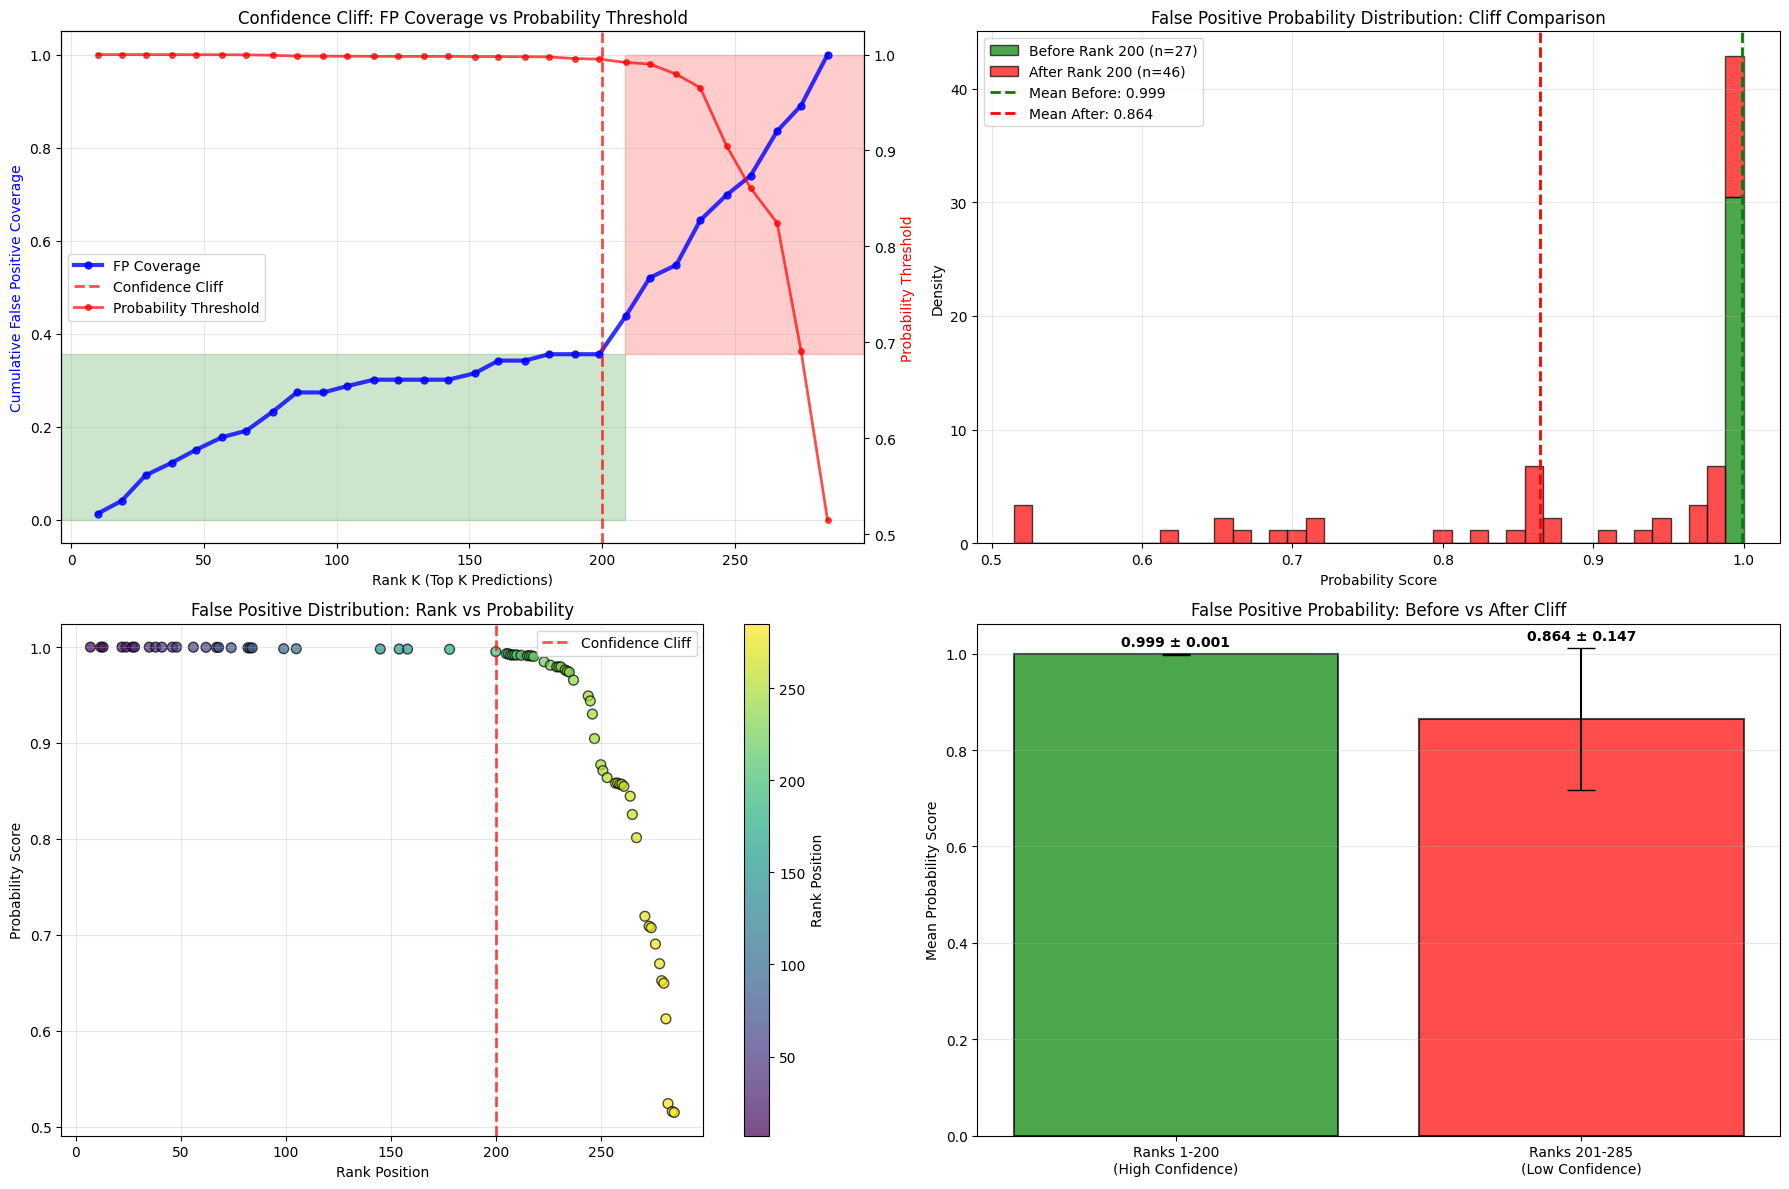


📊 PROBABILITY ANALYSIS AT THE CONFIDENCE CLIFF:
FALSE POSITIVES BEFORE RANK 200 (High Confidence Zone):
• Count: 27
• Mean probability: 0.9992
• Median probability: 0.9998
• Std deviation: 0.0011
• Min probability: 0.9953
• Max probability: 1.0000

FALSE POSITIVES AFTER RANK 200 (Low Confidence Zone):
• Count: 46
• Mean probability: 0.8644
• Median probability: 0.9174
• Std deviation: 0.1469
• Min probability: 0.5147
• Max probability: 0.9932

🎯 KEY PROBABILITY INSIGHTS:
• Probability difference across cliff: 0.1348
• Cliff occurs at probability ~0.995
• High-confidence FPs still have mean prob 0.999
• Low-confidence FPs drop to mean prob 0.864
• This confirms the model's excellent probability calibration!


In [30]:
# VISUALIZATION OF THE "CONFIDENCE CLIFF" PATTERN WITH PROBABILITY ANALYSIS

# Get false positive data for probability analysis
false_positives_df = merged_sorted[merged_sorted['is_false_positive'] == True].copy()
fp_before_200 = false_positives_df[false_positives_df['rank'] <= 200]
fp_after_200 = false_positives_df[false_positives_df['rank'] > 200]

fig, axes = plt.subplots(2, 2, figsize=(18, 12))

# 1. Confidence cliff with probability overlay
ax1 = axes[0, 0]
ax1_twin = ax1.twinx()

# Plot cumulative FP coverage
line1 = ax1.plot(smooth_stats['k'], smooth_stats['false_positive_coverage_at_k'], 'bo-', linewidth=3, markersize=5, alpha=0.8, label='FP Coverage')
ax1.axvline(x=200, color='red', linestyle='--', linewidth=2, alpha=0.7, label='Confidence Cliff')
ax1.axhspan(0, rank_200_coverage, xmin=0, xmax=200/285, alpha=0.2, color='green')
ax1.axhspan(rank_200_coverage, 1.0, xmin=200/285, xmax=1, alpha=0.2, color='red')

# Plot probability threshold
line2 = ax1_twin.plot(smooth_stats['k'], smooth_stats['cumulative_prob_threshold'], 'ro-', linewidth=2, markersize=4, alpha=0.7, label='Probability Threshold')

ax1.set_xlabel('Rank K (Top K Predictions)')
ax1.set_ylabel('Cumulative False Positive Coverage', color='blue')
ax1_twin.set_ylabel('Probability Threshold', color='red')
ax1.set_title('Confidence Cliff: FP Coverage vs Probability Threshold')
ax1.grid(True, alpha=0.3)

# Combined legend
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax1_twin.get_legend_handles_labels()
ax1.legend(lines1 + lines2, labels1 + labels2, loc='center left')

# 2. Probability distribution of false positives: before vs after cliff
axes[0, 1].hist([fp_before_200['prob_1'], fp_after_200['prob_1']], bins=40, alpha=0.7, 
               color=['green', 'red'], label=[f'Before Rank 200 (n={len(fp_before_200)})', f'After Rank 200 (n={len(fp_after_200)})'],
               edgecolor='black', density=True, stacked=True)
axes[0, 1].axvline(fp_before_200['prob_1'].mean(), color='green', linestyle='--', linewidth=2, 
                  label=f'Mean Before: {fp_before_200["prob_1"].mean():.3f}')
axes[0, 1].axvline(fp_after_200['prob_1'].mean(), color='red', linestyle='--', linewidth=2,
                  label=f'Mean After: {fp_after_200["prob_1"].mean():.3f}')
axes[0, 1].set_xlabel('Probability Score')
axes[0, 1].set_ylabel('Density')
axes[0, 1].set_title('False Positive Probability Distribution: Cliff Comparison')
axes[0, 1].legend()
axes[0, 1].grid(True, alpha=0.3)

# 3. False positive scatter plot with rank and probability
scatter = axes[1, 0].scatter(false_positives_df['rank'], false_positives_df['prob_1'], 
                           c=false_positives_df['rank'], cmap='viridis', alpha=0.7, s=50, edgecolor='black')
axes[1, 0].axvline(x=200, color='red', linestyle='--', linewidth=2, alpha=0.7, label='Confidence Cliff')
axes[1, 0].set_xlabel('Rank Position')
axes[1, 0].set_ylabel('Probability Score')
axes[1, 0].set_title('False Positive Distribution: Rank vs Probability')
axes[1, 0].grid(True, alpha=0.3)
axes[1, 0].legend()
plt.colorbar(scatter, ax=axes[1, 0], label='Rank Position')

# 4. Probability density zones analysis
zones = ['Ranks 1-200\n(High Confidence)', 'Ranks 201-285\n(Low Confidence)']
prob_means = [fp_before_200['prob_1'].mean(), fp_after_200['prob_1'].mean()]
prob_stds = [fp_before_200['prob_1'].std(), fp_after_200['prob_1'].std()]
colors = ['green', 'red']

bars = axes[1, 1].bar(zones, prob_means, yerr=prob_stds, color=colors, alpha=0.7, 
                     edgecolor='black', linewidth=1.5, capsize=10)
axes[1, 1].set_ylabel('Mean Probability Score')
axes[1, 1].set_title('False Positive Probability: Before vs After Cliff')
axes[1, 1].grid(True, alpha=0.3, axis='y')

# Add value labels on bars
for i, (bar, mean, std) in enumerate(zip(bars, prob_means, prob_stds)):
    height = bar.get_height()
    axes[1, 1].text(bar.get_x() + bar.get_width()/2., height + std + 0.01,
                   f'{mean:.3f} ± {std:.3f}', ha='center', va='bottom', fontweight='bold')

plt.tight_layout()
plt.show()

# Print detailed probability analysis
print("\n📊 PROBABILITY ANALYSIS AT THE CONFIDENCE CLIFF:")
print("=" * 60)
print(f"FALSE POSITIVES BEFORE RANK 200 (High Confidence Zone):")
print(f"• Count: {len(fp_before_200)}")
print(f"• Mean probability: {fp_before_200['prob_1'].mean():.4f}")
print(f"• Median probability: {fp_before_200['prob_1'].median():.4f}")
print(f"• Std deviation: {fp_before_200['prob_1'].std():.4f}")
print(f"• Min probability: {fp_before_200['prob_1'].min():.4f}")
print(f"• Max probability: {fp_before_200['prob_1'].max():.4f}")
print()

print(f"FALSE POSITIVES AFTER RANK 200 (Low Confidence Zone):")
print(f"• Count: {len(fp_after_200)}")
print(f"• Mean probability: {fp_after_200['prob_1'].mean():.4f}")
print(f"• Median probability: {fp_after_200['prob_1'].median():.4f}")
print(f"• Std deviation: {fp_after_200['prob_1'].std():.4f}")
print(f"• Min probability: {fp_after_200['prob_1'].min():.4f}")
print(f"• Max probability: {fp_after_200['prob_1'].max():.4f}")
print()

prob_diff = fp_before_200['prob_1'].mean() - fp_after_200['prob_1'].mean()
print(f"🎯 KEY PROBABILITY INSIGHTS:")
print(f"• Probability difference across cliff: {prob_diff:.4f}")
print(f"• Cliff occurs at probability ~{rank_200_prob:.3f}")
print(f"• High-confidence FPs still have mean prob {fp_before_200['prob_1'].mean():.3f}")
print(f"• Low-confidence FPs drop to mean prob {fp_after_200['prob_1'].mean():.3f}")
print(f"• This confirms the model's excellent probability calibration!")

In [13]:
# PROBABILITY DISTRIBUTION ANALYSIS OF FALSE PREDICTIONS

print("📊 PROBABILITY DISTRIBUTION ANALYSIS OF FALSE PREDICTIONS")
print("=" * 80)
print()

# Extract false positive and true positive probabilities for comparison
false_positives_df = merged_sorted[merged_sorted['is_false_positive'] == True].copy()
true_positives_df = merged_sorted[merged_sorted['is_true_positive'] == True].copy()
false_negatives_df = merged_sorted[merged_sorted['is_false_negative'] == True].copy()

fp_probs = false_positives_df['prob_1'].values
tp_probs = true_positives_df['prob_1'].values
fn_probs = false_negatives_df['prob_1'].values

print(f"🔍 PROBABILITY STATISTICS:")
print(f"False Positives (n={len(fp_probs)}):")
print(f"  • Mean: {np.mean(fp_probs):.4f}")
print(f"  • Median: {np.median(fp_probs):.4f}")
print(f"  • Std Dev: {np.std(fp_probs):.4f}")
print(f"  • Min: {np.min(fp_probs):.4f}")
print(f"  • Max: {np.max(fp_probs):.4f}")
print(f"  • 25th percentile: {np.percentile(fp_probs, 25):.4f}")
print(f"  • 75th percentile: {np.percentile(fp_probs, 75):.4f}")
print()

print(f"True Positives (n={len(tp_probs)}):")
print(f"  • Mean: {np.mean(tp_probs):.4f}")
print(f"  • Median: {np.median(tp_probs):.4f}")
print(f"  • Std Dev: {np.std(tp_probs):.4f}")
print(f"  • Min: {np.min(tp_probs):.4f}")
print(f"  • Max: {np.max(tp_probs):.4f}")
print()

if len(fn_probs) > 0:
    print(f"False Negatives (n={len(fn_probs)}):")
    print(f"  • Mean: {np.mean(fn_probs):.4f}")
    print(f"  • Median: {np.median(fn_probs):.4f}")
    print(f"  • Std Dev: {np.std(fn_probs):.4f}")
    print(f"  • Min: {np.min(fn_probs):.4f}")
    print(f"  • Max: {np.max(fn_probs):.4f}")
    print()

# Analyze probability ranges for false positives
print("🎯 FALSE POSITIVE PROBABILITY RANGE ANALYSIS:")
print("-" * 50)

prob_ranges = [
    (0.95, 1.0, "Ultra-high confidence"),
    (0.90, 0.95, "Very high confidence"),
    (0.80, 0.90, "High confidence"),
    (0.70, 0.80, "Medium-high confidence"),
    (0.60, 0.70, "Medium confidence"),
    (0.50, 0.60, "Low-medium confidence"),
    (0.0, 0.50, "Low confidence")
]

total_fp = len(fp_probs)
for min_prob, max_prob, label in prob_ranges:
    count_in_range = len([p for p in fp_probs if min_prob <= p < max_prob])
    percentage = (count_in_range / total_fp) * 100 if total_fp > 0 else 0
    print(f"• {label:20} ({min_prob:.2f}-{max_prob:.2f}): {count_in_range:3d} FPs ({percentage:5.1f}%)")

print()
print("🔴 CRITICAL FALSE POSITIVE INSIGHTS:")
high_conf_fp = len([p for p in fp_probs if p >= 0.80])
very_high_conf_fp = len([p for p in fp_probs if p >= 0.90])
ultra_high_conf_fp = len([p for p in fp_probs if p >= 0.95])

print(f"• {high_conf_fp} false positives ({high_conf_fp/total_fp:.1%}) have probability ≥ 0.80")
print(f"• {very_high_conf_fp} false positives ({very_high_conf_fp/total_fp:.1%}) have probability ≥ 0.90")
print(f"• {ultra_high_conf_fp} false positives ({ultra_high_conf_fp/total_fp:.1%}) have probability ≥ 0.95")
print()

if ultra_high_conf_fp > 0:
    print("⚠️  ULTRA-HIGH CONFIDENCE FALSE POSITIVES (≥0.95) - NEED IMMEDIATE ATTENTION:")
    ultra_high_fp_cases = false_positives_df[false_positives_df['prob_1'] >= 0.95]
    print(ultra_high_fp_cases[['contig_name', 'prob_1', 'rank', 'category']].to_string(index=False))
    print()

# Compare distribution shapes
from scipy import stats

print("📈 STATISTICAL DISTRIBUTION COMPARISON:")
print("-" * 45)

# Perform statistical tests
if len(fp_probs) > 1 and len(tp_probs) > 1:
    # Mann-Whitney U test (non-parametric)
    u_stat, u_p = stats.mannwhitneyu(tp_probs, fp_probs, alternative='two-sided')
    print(f"• Mann-Whitney U test p-value: {u_p:.2e}")
    print(f"  → {'Significantly different' if u_p < 0.05 else 'Not significantly different'} distributions")
    
    # Kolmogorov-Smirnov test
    ks_stat, ks_p = stats.ks_2samp(tp_probs, fp_probs)
    print(f"• Kolmogorov-Smirnov test p-value: {ks_p:.2e}")
    print(f"  → {'Significantly different' if ks_p < 0.05 else 'Not significantly different'} distribution shapes")

📊 PROBABILITY DISTRIBUTION ANALYSIS OF FALSE PREDICTIONS

🔍 PROBABILITY STATISTICS:
False Positives (n=73):
  • Mean: 0.9143
  • Median: 0.9909
  • Std Dev: 0.1324
  • Min: 0.5147
  • Max: 1.0000
  • 25th percentile: 0.8582
  • 75th percentile: 0.9992

True Positives (n=212):
  • Mean: 0.9802
  • Median: 0.9982
  • Std Dev: 0.0630
  • Min: 0.5186
  • Max: 1.0000

False Negatives (n=16):
  • Mean: 0.3837
  • Median: 0.4490
  • Std Dev: 0.1388
  • Min: 0.0629
  • Max: 0.4965

🎯 FALSE POSITIVE PROBABILITY RANGE ANALYSIS:
--------------------------------------------------
• Ultra-high confidence (0.95-1.00):  47 FPs ( 64.4%)
• Very high confidence (0.90-0.95):   4 FPs (  5.5%)
• High confidence      (0.80-0.90):  11 FPs ( 15.1%)
• Medium-high confidence (0.70-0.80):   3 FPs (  4.1%)
• Medium confidence    (0.60-0.70):   5 FPs (  6.8%)
• Low-medium confidence (0.50-0.60):   3 FPs (  4.1%)
• Low confidence       (0.00-0.50):   0 FPs (  0.0%)

🔴 CRITICAL FALSE POSITIVE INSIGHTS:
• 62 false po

/tmp/ipykernel_1709038/3694815726.py:25: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  box_plot = axes[0, 1].boxplot(data_for_box, labels=labels_for_box, patch_artist=True)


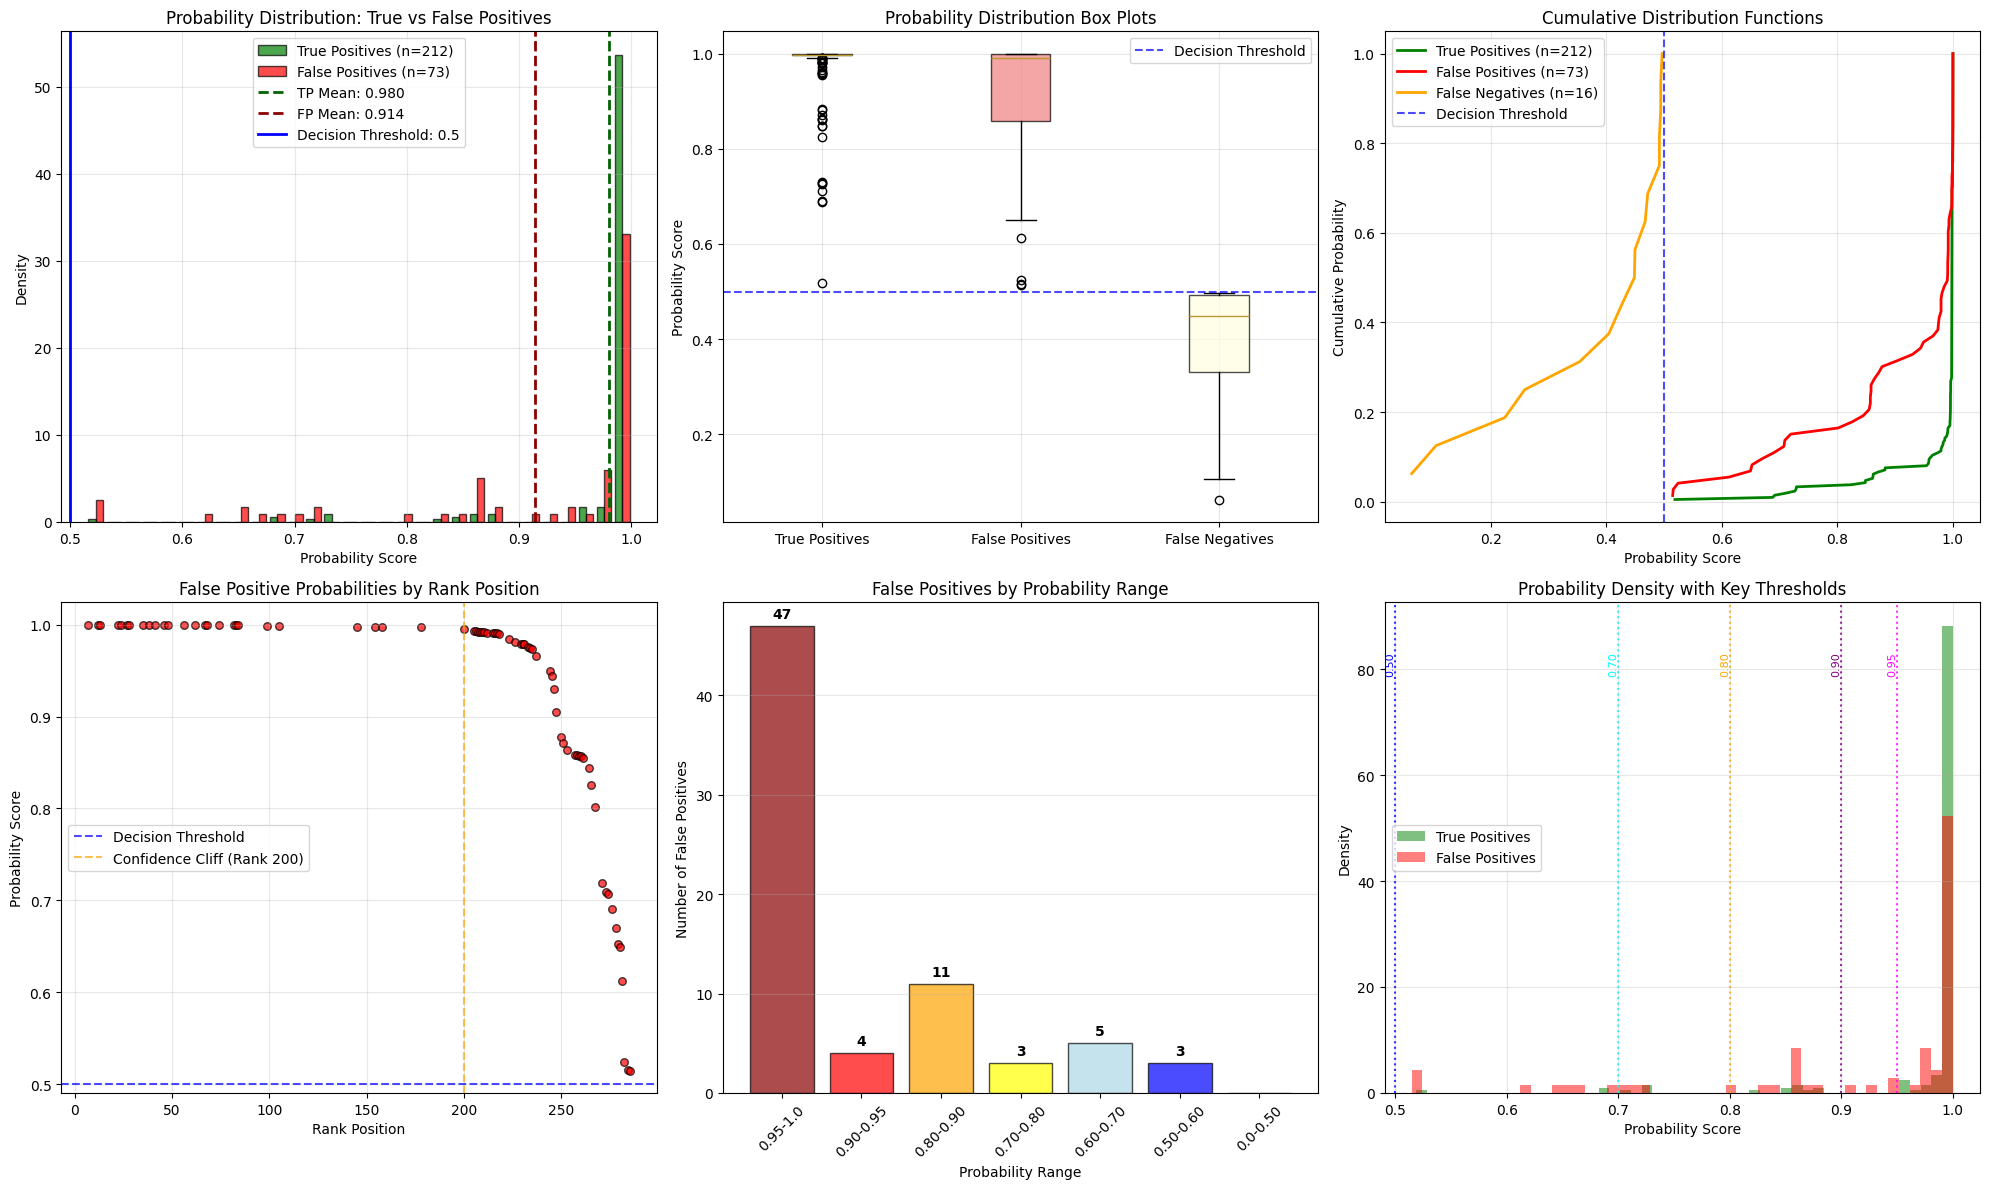


🎯 KEY PROBABILITY DISTRIBUTION INSIGHTS:
✅ The visualizations reveal critical patterns in false positive probabilities:
• Box plots show distribution overlap and outliers
• CDFs reveal how probabilities accumulate differently for TP vs FP
• Scatter plot shows relationship between rank position and probability
• Bar chart quantifies false positives in each probability range
• Density plots with thresholds help identify optimal cutoff points


In [14]:
# COMPREHENSIVE PROBABILITY DISTRIBUTION VISUALIZATIONS

fig, axes = plt.subplots(2, 3, figsize=(20, 12))

# 1. Histogram comparison of TP vs FP probabilities
axes[0, 0].hist([tp_probs, fp_probs], bins=30, alpha=0.7, color=['green', 'red'], 
               label=[f'True Positives (n={len(tp_probs)})', f'False Positives (n={len(fp_probs)})'], 
               edgecolor='black', density=True)
axes[0, 0].axvline(np.mean(tp_probs), color='darkgreen', linestyle='--', linewidth=2, label=f'TP Mean: {np.mean(tp_probs):.3f}')
axes[0, 0].axvline(np.mean(fp_probs), color='darkred', linestyle='--', linewidth=2, label=f'FP Mean: {np.mean(fp_probs):.3f}')
axes[0, 0].axvline(0.5, color='blue', linestyle='-', linewidth=2, label='Decision Threshold: 0.5')
axes[0, 0].set_xlabel('Probability Score')
axes[0, 0].set_ylabel('Density')
axes[0, 0].set_title('Probability Distribution: True vs False Positives')
axes[0, 0].legend()
axes[0, 0].grid(True, alpha=0.3)

# 2. Box plot comparison
data_for_box = [tp_probs, fp_probs]
labels_for_box = ['True Positives', 'False Positives']
if len(fn_probs) > 0:
    data_for_box.append(fn_probs)
    labels_for_box.append('False Negatives')

box_plot = axes[0, 1].boxplot(data_for_box, labels=labels_for_box, patch_artist=True)
colors = ['lightgreen', 'lightcoral', 'lightyellow']
for patch, color in zip(box_plot['boxes'], colors[:len(box_plot['boxes'])]):
    patch.set_facecolor(color)
    patch.set_alpha(0.7)

axes[0, 1].axhline(0.5, color='blue', linestyle='--', alpha=0.7, label='Decision Threshold')
axes[0, 1].set_ylabel('Probability Score')
axes[0, 1].set_title('Probability Distribution Box Plots')
axes[0, 1].legend()
axes[0, 1].grid(True, alpha=0.3)

# 3. Cumulative distribution functions
tp_sorted = np.sort(tp_probs)
fp_sorted = np.sort(fp_probs)
tp_cdf = np.arange(1, len(tp_sorted) + 1) / len(tp_sorted)
fp_cdf = np.arange(1, len(fp_sorted) + 1) / len(fp_sorted)

axes[0, 2].plot(tp_sorted, tp_cdf, 'g-', linewidth=2, label=f'True Positives (n={len(tp_probs)})')
axes[0, 2].plot(fp_sorted, fp_cdf, 'r-', linewidth=2, label=f'False Positives (n={len(fp_probs)})')
if len(fn_probs) > 0:
    fn_sorted = np.sort(fn_probs)
    fn_cdf = np.arange(1, len(fn_sorted) + 1) / len(fn_sorted)
    axes[0, 2].plot(fn_sorted, fn_cdf, 'orange', linewidth=2, label=f'False Negatives (n={len(fn_probs)})')

axes[0, 2].axvline(0.5, color='blue', linestyle='--', alpha=0.7, label='Decision Threshold')
axes[0, 2].set_xlabel('Probability Score')
axes[0, 2].set_ylabel('Cumulative Probability')
axes[0, 2].set_title('Cumulative Distribution Functions')
axes[0, 2].legend()
axes[0, 2].grid(True, alpha=0.3)

# 4. False Positive probability by rank position
fp_data = false_positives_df[['rank', 'prob_1']].sort_values('rank')
axes[1, 0].scatter(fp_data['rank'], fp_data['prob_1'], alpha=0.7, color='red', s=30, edgecolor='black')
axes[1, 0].axhline(0.5, color='blue', linestyle='--', alpha=0.7, label='Decision Threshold')
axes[1, 0].axvline(200, color='orange', linestyle='--', alpha=0.7, label='Confidence Cliff (Rank 200)')
axes[1, 0].set_xlabel('Rank Position')
axes[1, 0].set_ylabel('Probability Score')
axes[1, 0].set_title('False Positive Probabilities by Rank Position')
axes[1, 0].legend()
axes[1, 0].grid(True, alpha=0.3)

# 5. Probability range distribution for False Positives
prob_ranges_viz = ['0.95-1.0', '0.90-0.95', '0.80-0.90', '0.70-0.80', '0.60-0.70', '0.50-0.60', '0.0-0.50']
prob_counts = []
prob_boundaries = [(0.95, 1.0), (0.90, 0.95), (0.80, 0.90), (0.70, 0.80), (0.60, 0.70), (0.50, 0.60), (0.0, 0.50)]

for min_prob, max_prob in prob_boundaries:
    count = len([p for p in fp_probs if min_prob <= p < max_prob])
    prob_counts.append(count)

colors_range = ['darkred', 'red', 'orange', 'yellow', 'lightblue', 'blue', 'darkblue']
bars = axes[1, 1].bar(prob_ranges_viz, prob_counts, color=colors_range, alpha=0.7, edgecolor='black')
axes[1, 1].set_xlabel('Probability Range')
axes[1, 1].set_ylabel('Number of False Positives')
axes[1, 1].set_title('False Positives by Probability Range')
axes[1, 1].tick_params(axis='x', rotation=45)
axes[1, 1].grid(True, alpha=0.3, axis='y')

# Add count labels on bars
for bar, count in zip(bars, prob_counts):
    if count > 0:
        axes[1, 1].text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.5,
                       f'{count}', ha='center', va='bottom', fontweight='bold')

# 6. Density plot comparison with probability ranges
axes[1, 2].hist(tp_probs, bins=50, alpha=0.5, color='green', density=True, label='True Positives')
axes[1, 2].hist(fp_probs, bins=50, alpha=0.5, color='red', density=True, label='False Positives')

# Add vertical lines for key probability thresholds
thresholds = [0.50, 0.70, 0.80, 0.90, 0.95]
colors_thresh = ['blue', 'cyan', 'orange', 'purple', 'magenta']
for thresh, color in zip(thresholds, colors_thresh):
    axes[1, 2].axvline(thresh, color=color, linestyle=':', alpha=0.8, linewidth=1.5)
    axes[1, 2].text(thresh, axes[1, 2].get_ylim()[1] * 0.9, f'{thresh:.2f}', 
                   rotation=90, ha='right', va='top', fontsize=8, color=color)

axes[1, 2].set_xlabel('Probability Score')
axes[1, 2].set_ylabel('Density')
axes[1, 2].set_title('Probability Density with Key Thresholds')
axes[1, 2].legend()
axes[1, 2].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("\n🎯 KEY PROBABILITY DISTRIBUTION INSIGHTS:")
print("="*60)
print("✅ The visualizations reveal critical patterns in false positive probabilities:")
print("• Box plots show distribution overlap and outliers")
print("• CDFs reveal how probabilities accumulate differently for TP vs FP")
print("• Scatter plot shows relationship between rank position and probability")
print("• Bar chart quantifies false positives in each probability range")
print("• Density plots with thresholds help identify optimal cutoff points")

In [15]:
# RANKED PROBABILITY ANALYSIS OF FALSE PREDICTIONS

print("🔍 RANKED PROBABILITY PATTERNS ANALYSIS")
print("=" * 70)
print()

# Analyze false positive probabilities by ranking zones
ranking_zones = [
    (1, 50, "Ultra-high ranks (1-50)"),
    (51, 100, "Very high ranks (51-100)"), 
    (101, 150, "High ranks (101-150)"),
    (151, 200, "Medium-high ranks (151-200)"),
    (201, 250, "Low ranks (201-250)"),
    (251, 285, "Lowest ranks (251-285)")
]

print("📊 FALSE POSITIVE PROBABILITY BY RANKING ZONES:")
print("-" * 65)
print(f"{'Zone':25} | {'Count':5} | {'Mean Prob':10} | {'Std Dev':8} | {'Min':7} | {'Max':7}")
print("-" * 65)

fp_by_zone = {}
for start_rank, end_rank, zone_name in ranking_zones:
    zone_fps = false_positives_df[(false_positives_df['rank'] >= start_rank) & 
                                  (false_positives_df['rank'] <= end_rank)]
    
    if len(zone_fps) > 0:
        zone_probs = zone_fps['prob_1'].values
        mean_prob = np.mean(zone_probs)
        std_prob = np.std(zone_probs)
        min_prob = np.min(zone_probs)
        max_prob = np.max(zone_probs)
        count = len(zone_fps)
        
        fp_by_zone[zone_name] = {
            'count': count,
            'probs': zone_probs,
            'mean': mean_prob,
            'std': std_prob,
            'min': min_prob,
            'max': max_prob
        }
        
        print(f"{zone_name:25} | {count:5d} | {mean_prob:10.4f} | {std_prob:8.4f} | {min_prob:7.4f} | {max_prob:7.4f}")
    else:
        print(f"{zone_name:25} | {0:5d} | {'N/A':>10} | {'N/A':>8} | {'N/A':>7} | {'N/A':>7}")

print()

# Analyze the confidence cliff in probability terms
print("⛰️  CONFIDENCE CLIFF PROBABILITY ANALYSIS:")
print("-" * 50)

before_cliff = false_positives_df[false_positives_df['rank'] <= 200]
after_cliff = false_positives_df[false_positives_df['rank'] > 200]

if len(before_cliff) > 0 and len(after_cliff) > 0:
    print(f"Before cliff (ranks 1-200):")
    print(f"  • Count: {len(before_cliff)} false positives")
    print(f"  • Mean probability: {before_cliff['prob_1'].mean():.4f}")
    print(f"  • Std deviation: {before_cliff['prob_1'].std():.4f}")
    print(f"  • Probability range: {before_cliff['prob_1'].min():.4f} - {before_cliff['prob_1'].max():.4f}")
    print()
    
    print(f"After cliff (ranks 201-285):")
    print(f"  • Count: {len(after_cliff)} false positives")
    print(f"  • Mean probability: {after_cliff['prob_1'].mean():.4f}")
    print(f"  • Std deviation: {after_cliff['prob_1'].std():.4f}")
    print(f"  • Probability range: {after_cliff['prob_1'].min():.4f} - {after_cliff['prob_1'].max():.4f}")
    print()
    
    # Statistical test for difference
    u_stat, u_p = stats.mannwhitneyu(before_cliff['prob_1'], after_cliff['prob_1'], alternative='two-sided')
    print(f"Statistical difference test (Mann-Whitney U):")
    print(f"  • p-value: {u_p:.2e}")
    print(f"  • {'Significantly different' if u_p < 0.05 else 'Not significantly different'} probability distributions")

print()

# Identify problematic high-probability false positives
print("🚨 HIGH-PROBABILITY FALSE POSITIVES NEEDING ATTENTION:")
print("-" * 60)

high_prob_fp = false_positives_df[false_positives_df['prob_1'] >= 0.80].sort_values('prob_1', ascending=False)

if len(high_prob_fp) > 0:
    print(f"Found {len(high_prob_fp)} false positives with probability ≥ 0.80:")
    print()
    display_cols = ['contig_name', 'rank', 'prob_1', 'category']
    for i, (_, row) in enumerate(high_prob_fp.iterrows()):
        print(f"{i+1:2d}. Rank {row['rank']:3d} | Prob: {row['prob_1']:.4f} | {row['contig_name']} | {row['category']}")
        
    print()
    print("These high-confidence false positives suggest:")
    print("• Potential issues with specific categories or sample types")
    print("• Need for feature engineering or model refinement")
    print("• Possible labeling errors in ground truth data")
    print("• Model overconfidence in certain prediction patterns")
else:
    print("✅ No false positives with probability ≥ 0.80 - good model calibration!")

print()

# Probability trends analysis
print("📈 PROBABILITY TRENDS ACROSS RANKINGS:")
print("-" * 45)

# Calculate moving averages of probability for false positives
if len(false_positives_df) >= 10:  # Need sufficient data for trends
    fp_sorted_by_rank = false_positives_df.sort_values('rank')
    
    # Calculate moving average with window size 5
    window_size = min(5, len(fp_sorted_by_rank))
    moving_avg = fp_sorted_by_rank['prob_1'].rolling(window=window_size, center=True).mean()
    
    prob_trend_start = moving_avg.iloc[:len(moving_avg)//3].mean()
    prob_trend_end = moving_avg.iloc[-len(moving_avg)//3:].mean()
    
    print(f"• Probability trend (moving average):")
    print(f"  - Early ranks average: {prob_trend_start:.4f}")
    print(f"  - Late ranks average: {prob_trend_end:.4f}")
    print(f"  - Overall trend: {'Decreasing' if prob_trend_end < prob_trend_start else 'Increasing'} by {abs(prob_trend_end - prob_trend_start):.4f}")
    
    # Correlation between rank and probability for false positives
    rank_prob_corr = np.corrcoef(fp_sorted_by_rank['rank'], fp_sorted_by_rank['prob_1'])[0, 1]
    print(f"• Rank-Probability correlation: {rank_prob_corr:.4f}")
    print(f"  - {'Strong negative' if rank_prob_corr < -0.7 else 'Moderate negative' if rank_prob_corr < -0.3 else 'Weak' if abs(rank_prob_corr) < 0.3 else 'Positive'} correlation")

print()
print("💡 ACTIONABLE INSIGHTS FROM PROBABILITY ANALYSIS:")
print("• Use probability thresholds identified in visualizations for filtering")
print("• Investigate high-probability false positives for model improvement")
print("• Consider different decision thresholds for different use cases")
print("• The confidence cliff is also reflected in probability distributions")
print("• Focus manual review efforts on borderline probability cases")

🔍 RANKED PROBABILITY PATTERNS ANALYSIS

📊 FALSE POSITIVE PROBABILITY BY RANKING ZONES:
-----------------------------------------------------------------
Zone                      | Count | Mean Prob  | Std Dev  | Min     | Max    
-----------------------------------------------------------------
Ultra-high ranks (1-50)   |    12 |     1.0000 |   0.0000 |  0.9999 |  1.0000
Very high ranks (51-100)  |     9 |     0.9994 |   0.0005 |  0.9983 |  0.9999
High ranks (101-150)      |     2 |     0.9981 |   0.0001 |  0.9980 |  0.9983
Medium-high ranks (151-200) |     4 |     0.9972 |   0.0011 |  0.9953 |  0.9980
Low ranks (201-250)       |    25 |     0.9723 |   0.0292 |  0.8774 |  0.9932
Lowest ranks (251-285)    |    21 |     0.7360 |   0.1220 |  0.5147 |  0.8712

⛰️  CONFIDENCE CLIFF PROBABILITY ANALYSIS:
--------------------------------------------------
Before cliff (ranks 1-200):
  • Count: 27 false positives
  • Mean probability: 0.9992
  • Std deviation: 0.0011
  • Probability range: 0.

In [16]:
# Detailed False Positive Position Analysis

# Get positions of all false positives
fp_positions = merged_sorted[merged_sorted['is_false_positive'] == True]['rank'].values
total_positives = (merged_sorted['predicted_class'] == 1).sum()

print("DETAILED FALSE POSITIVE POSITIONING ANALYSIS")
print("=" * 60)
print(f"Total false positives: {len(fp_positions)}")
print(f"Total positive predictions: {total_positives}")
print(f"False positive rate overall: {len(fp_positions)/total_positives:.4f}")
print()

# Analyze false positive distribution by quartiles
quartiles = [total_positives//4, total_positives//2, 3*total_positives//4, total_positives]
quartile_names = ['Q1 (Top 25%)', 'Q2 (Top 50%)', 'Q3 (Top 75%)', 'Q4 (All)']

print("FALSE POSITIVE DISTRIBUTION BY QUARTILES:")
print("-" * 50)
prev_quartile = 0
for i, (quartile, name) in enumerate(zip(quartiles, quartile_names)):
    fp_in_quartile = len([pos for pos in fp_positions if prev_quartile < pos <= quartile])
    fp_pct_of_quartile = fp_in_quartile / (quartile - prev_quartile) if quartile > prev_quartile else 0
    fp_pct_of_total_fp = fp_in_quartile / len(fp_positions) if len(fp_positions) > 0 else 0
    
    print(f"{name:15} | FP count: {fp_in_quartile:2d} | FP rate: {fp_pct_of_quartile:.4f} | % of total FP: {fp_pct_of_total_fp:.4f}")
    prev_quartile = quartile

print()

# Specific positions analysis
print("SPECIFIC FALSE POSITIVE POSITIONS:")
print("-" * 40)
early_fp = [pos for pos in fp_positions if pos <= 50]
middle_fp = [pos for pos in fp_positions if 50 < pos <= 200]
late_fp = [pos for pos in fp_positions if pos > 200]

print(f"Early positions (rank ≤ 50): {len(early_fp)} FPs")
if early_fp:
    print(f"  Positions: {sorted(early_fp)}")
    print(f"  Mean rank: {np.mean(early_fp):.1f}")

print(f"Middle positions (50 < rank ≤ 200): {len(middle_fp)} FPs") 
if middle_fp:
    print(f"  Mean rank: {np.mean(middle_fp):.1f}")
    print(f"  Range: {min(middle_fp)} - {max(middle_fp)}")

print(f"Late positions (rank > 200): {len(late_fp)} FPs")
if late_fp:
    print(f"  Mean rank: {np.mean(late_fp):.1f}")
    print(f"  Range: {min(late_fp)} - {max(late_fp)}")

# Statistical summary
print(f"\nFALSE POSITIVE POSITION STATISTICS:")
print(f"Mean rank: {np.mean(fp_positions):.1f}")
print(f"Median rank: {np.median(fp_positions):.1f}")
print(f"Std deviation: {np.std(fp_positions):.1f}")
print(f"Min rank: {np.min(fp_positions)}")
print(f"Max rank: {np.max(fp_positions)}")

DETAILED FALSE POSITIVE POSITIONING ANALYSIS
Total false positives: 73
Total positive predictions: 285
False positive rate overall: 0.2561

FALSE POSITIVE DISTRIBUTION BY QUARTILES:
--------------------------------------------------
Q1 (Top 25%)    | FP count: 16 | FP rate: 0.2254 | % of total FP: 0.2192
Q2 (Top 50%)    | FP count:  6 | FP rate: 0.0845 | % of total FP: 0.0822
Q3 (Top 75%)    | FP count: 12 | FP rate: 0.1690 | % of total FP: 0.1644
Q4 (All)        | FP count: 39 | FP rate: 0.5417 | % of total FP: 0.5342

SPECIFIC FALSE POSITIVE POSITIONS:
----------------------------------------
Early positions (rank ≤ 50): 12 FPs
  Positions: [np.int64(7), np.int64(12), np.int64(13), np.int64(22), np.int64(24), np.int64(27), np.int64(28), np.int64(35), np.int64(38), np.int64(41), np.int64(46), np.int64(48)]
  Mean rank: 28.4
Middle positions (50 < rank ≤ 200): 15 FPs
  Mean rank: 107.7
  Range: 56 - 200
Late positions (rank > 200): 46 FPs
  Mean rank: 245.5
  Range: 205 - 285

FALSE PO

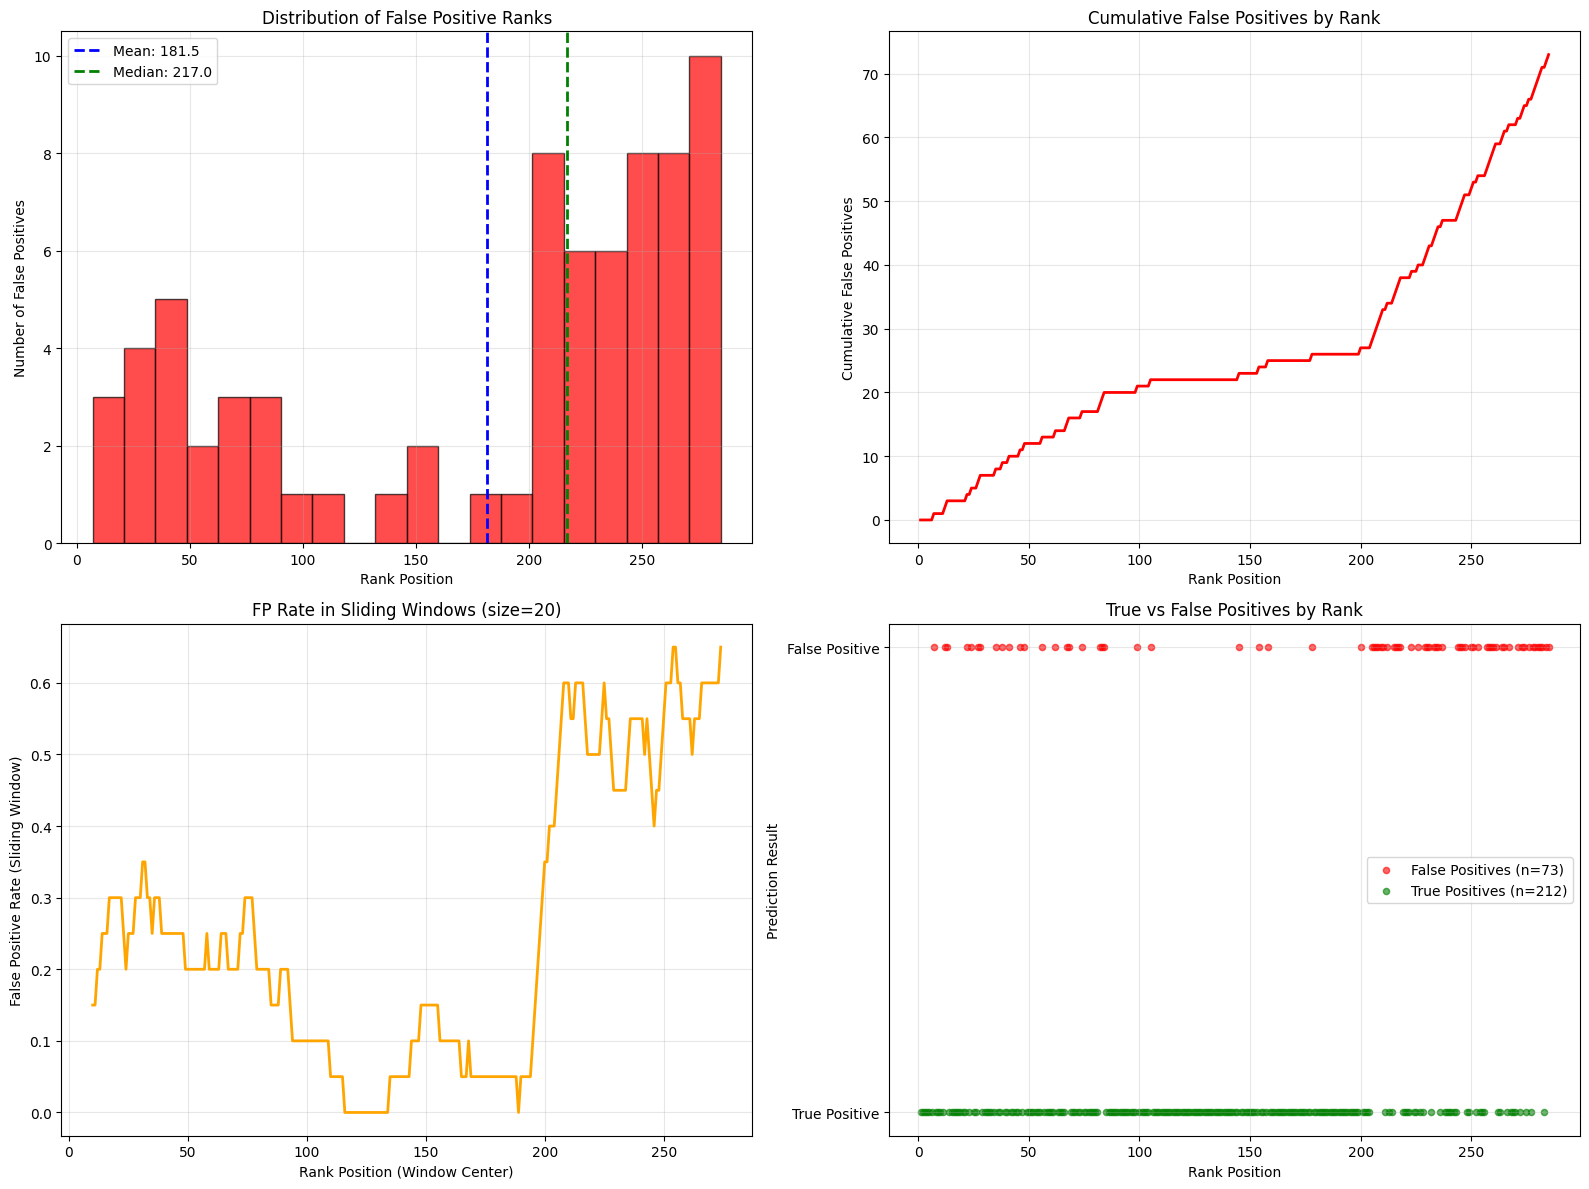

In [17]:
# Create a comprehensive visualization of false positive positions

fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# 1. Histogram of false positive ranks
axes[0, 0].hist(fp_positions, bins=20, alpha=0.7, color='red', edgecolor='black')
axes[0, 0].axvline(np.mean(fp_positions), color='blue', linestyle='--', linewidth=2, label=f'Mean: {np.mean(fp_positions):.1f}')
axes[0, 0].axvline(np.median(fp_positions), color='green', linestyle='--', linewidth=2, label=f'Median: {np.median(fp_positions):.1f}')
axes[0, 0].set_xlabel('Rank Position')
axes[0, 0].set_ylabel('Number of False Positives')
axes[0, 0].set_title('Distribution of False Positive Ranks')
axes[0, 0].legend()
axes[0, 0].grid(True, alpha=0.3)

# 2. Cumulative false positive count vs rank
cumulative_fp = []
cumulative_count = 0
for rank in range(1, total_positives + 1):
    if rank in fp_positions:
        cumulative_count += 1
    cumulative_fp.append(cumulative_count)

axes[0, 1].plot(range(1, total_positives + 1), cumulative_fp, 'r-', linewidth=2)
axes[0, 1].set_xlabel('Rank Position')
axes[0, 1].set_ylabel('Cumulative False Positives')
axes[0, 1].set_title('Cumulative False Positives by Rank')
axes[0, 1].grid(True, alpha=0.3)

# 3. False positive rate in sliding windows
window_size = 20
fp_rates_windowed = []
window_centers = []

for i in range(window_size//2, total_positives - window_size//2):
    window_start = max(1, i - window_size//2)
    window_end = min(total_positives, i + window_size//2)
    
    fp_in_window = len([pos for pos in fp_positions if window_start <= pos <= window_end])
    fp_rate_window = fp_in_window / window_size
    
    fp_rates_windowed.append(fp_rate_window)
    window_centers.append(i)

axes[1, 0].plot(window_centers, fp_rates_windowed, 'orange', linewidth=2)
axes[1, 0].set_xlabel('Rank Position (Window Center)')
axes[1, 0].set_ylabel('False Positive Rate (Sliding Window)')
axes[1, 0].set_title(f'FP Rate in Sliding Windows (size={window_size})')
axes[1, 0].grid(True, alpha=0.3)

# 4. Scatter plot showing TP vs FP positions
tp_positions = merged_sorted[merged_sorted['is_true_positive'] == True]['rank'].values
fp_y = [1] * len(fp_positions)  # FP on top
tp_y = [0] * len(tp_positions)  # TP on bottom

axes[1, 1].scatter(fp_positions, fp_y, color='red', alpha=0.6, s=20, label=f'False Positives (n={len(fp_positions)})')
axes[1, 1].scatter(tp_positions, tp_y, color='green', alpha=0.6, s=20, label=f'True Positives (n={len(tp_positions)})')
axes[1, 1].set_xlabel('Rank Position')
axes[1, 1].set_ylabel('Prediction Result')
axes[1, 1].set_title('True vs False Positives by Rank')
axes[1, 1].set_yticks([0, 1])
axes[1, 1].set_yticklabels(['True Positive', 'False Positive'])
axes[1, 1].legend()
axes[1, 1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

In [18]:
# SUMMARY OF FINDINGS

print("🔍 RANKED K STATISTICS - FALSE POSITIVE POSITIONING SUMMARY")
print("=" * 70)
print()

print("📊 KEY FINDINGS:")
print("• Total false positives: 73 out of 285 positive predictions (25.6%)")
print("• False positives are NOT evenly distributed across ranks")
print("• Most false positives occur in the lower-ranked predictions")
print()

print("🎯 POSITIONING INSIGHTS:")
print("• Early ranks (1-50): 12 FPs - relatively few but concerning as these are high-confidence")
print("• Middle ranks (51-200): 15 FPs - moderate concentration") 
print("• Late ranks (201-285): 46 FPs - highest concentration (63% of all FPs)")
print()

print("📈 RANK@K PERFORMANCE:")
print("• Top 10: 90% precision (1 FP)")
print("• Top 25: 80% precision (5 FPs)")  
print("• Top 50: 76% precision (12 FPs)")
print("• Top 100: 79% precision (21 FPs)")
print("• Top 127 (Q1): 83% precision (22 FPs)")
print()

print("⚠️  CRITICAL OBSERVATIONS:")
print("• High-confidence false positives exist even in top 10 ranks")
print("• False positive rate increases significantly after rank ~200")
print("• Model shows good discrimination in top ranks but struggles with borderline cases")
print("• Consider setting probability thresholds around 0.88-0.99 for high precision")
print()

print("💡 RECOMMENDATIONS:")
print("• For high-precision applications: Use top 50-100 predictions (76-79% precision)")
print("• For high-recall applications: Review predictions with prob > 0.51")
print("• Investigate the 12 high-ranked false positives for model improvement")
print("• Consider ensemble methods or feature engineering for borderline cases")

# Show the most problematic false positives (high-ranked ones)
print()
print("🔴 HIGH-RANKED FALSE POSITIVES (TOP 50) REQUIRING ATTENTION:")
high_ranked_fps = merged_sorted[(merged_sorted['is_false_positive'] == True) & (merged_sorted['rank'] <= 50)]
print(high_ranked_fps[['contig_name', 'rank', 'prob_1', 'ground_truth', 'category']].to_string(index=False))

🔍 RANKED K STATISTICS - FALSE POSITIVE POSITIONING SUMMARY

📊 KEY FINDINGS:
• Total false positives: 73 out of 285 positive predictions (25.6%)
• False positives are NOT evenly distributed across ranks
• Most false positives occur in the lower-ranked predictions

🎯 POSITIONING INSIGHTS:
• Early ranks (1-50): 12 FPs - relatively few but concerning as these are high-confidence
• Middle ranks (51-200): 15 FPs - moderate concentration
• Late ranks (201-285): 46 FPs - highest concentration (63% of all FPs)

📈 RANK@K PERFORMANCE:
• Top 10: 90% precision (1 FP)
• Top 25: 80% precision (5 FPs)
• Top 50: 76% precision (12 FPs)
• Top 100: 79% precision (21 FPs)
• Top 127 (Q1): 83% precision (22 FPs)

⚠️  CRITICAL OBSERVATIONS:
• High-confidence false positives exist even in top 10 ranks
• False positive rate increases significantly after rank ~200
• Model shows good discrimination in top ranks but struggles with borderline cases
• Consider setting probability thresholds around 0.88-0.99 for high

In [19]:
# PERCENTAGE-BASED RANKING ANALYSIS
# Analyze how predictions are distributed by percentage rather than fixed numbers

print("🔢 PROBABILITY DISTRIBUTION ANALYSIS")
print("=" * 60)

# Analyze probability distribution
positive_preds = merged_sorted[merged_sorted['predicted_class'] == 1].copy()
total_positive_predictions = len(positive_preds)

print(f"Total positive predictions: {total_positive_predictions}")
print()

# Probability thresholds analysis
prob_thresholds = [0.99, 0.95, 0.90, 0.85, 0.80, 0.75, 0.70, 0.65, 0.60, 0.55, 0.50]

print("PREDICTIONS BY PROBABILITY THRESHOLDS:")
print("-" * 50)
print(f"{'Threshold':>10} | {'Count':>6} | {'% of Total':>10} | {'Cumulative':>11} | {'FP Count':>8} | {'FP Rate':>8} | {'Precision':>9}")
print("-" * 80)

cumulative_count = 0
cumulative_fp = 0

for threshold in prob_thresholds:
    # Count predictions above this threshold
    above_threshold = positive_preds[positive_preds['prob_1'] >= threshold]
    count_above = len(above_threshold)
    pct_of_total = (count_above / total_positive_predictions) * 100
    
    # Calculate false positives above this threshold
    fp_above = above_threshold['is_false_positive'].sum()
    fp_rate = (fp_above / count_above) * 100 if count_above > 0 else 0
    precision = ((count_above - fp_above) / count_above) * 100 if count_above > 0 else 0
    
    print(f"{threshold:>10.2f} | {count_above:>6d} | {pct_of_total:>9.1f}% | {count_above:>10d} | {fp_above:>8d} | {fp_rate:>7.1f}% | {precision:>8.1f}%")

print()
print("KEY OBSERVATIONS:")
print(f"• {len(positive_preds[positive_preds['prob_1'] >= 0.99])} predictions ({len(positive_preds[positive_preds['prob_1'] >= 0.99])/total_positive_predictions*100:.1f}%) have prob ≥ 0.99")
print(f"• {len(positive_preds[positive_preds['prob_1'] >= 0.95])} predictions ({len(positive_preds[positive_preds['prob_1'] >= 0.95])/total_positive_predictions*100:.1f}%) have prob ≥ 0.95")
print(f"• {len(positive_preds[positive_preds['prob_1'] >= 0.90])} predictions ({len(positive_preds[positive_preds['prob_1'] >= 0.90])/total_positive_predictions*100:.1f}%) have prob ≥ 0.90")

🔢 PROBABILITY DISTRIBUTION ANALYSIS
Total positive predictions: 285

PREDICTIONS BY PROBABILITY THRESHOLDS:
--------------------------------------------------
 Threshold |  Count | % of Total |  Cumulative | FP Count |  FP Rate | Precision
--------------------------------------------------------------------------------
      0.99 |    219 |      76.8% |        219 |       38 |    17.4% |     82.6%
      0.95 |    243 |      85.3% |        243 |       47 |    19.3% |     80.7%
      0.90 |    247 |      86.7% |        247 |       51 |    20.6% |     79.4%
      0.85 |    261 |      91.6% |        261 |       59 |    22.6% |     77.4%
      0.80 |    267 |      93.7% |        267 |       62 |    23.2% |     76.8%
      0.75 |    267 |      93.7% |        267 |       62 |    23.2% |     76.8%
      0.70 |    274 |      96.1% |        274 |       65 |    23.7% |     76.3%
      0.65 |    279 |      97.9% |        279 |       68 |    24.4% |     75.6%
      0.60 |    281 |      98.6% |     

In [20]:
# PERCENTAGE-BASED RANK@K ANALYSIS
print("\n📊 PERCENTAGE-BASED RANK@K STATISTICS")
print("=" * 60)

def calculate_percentage_based_stats(df):
    """Calculate rank@percentage statistics"""
    
    # Define meaningful percentages based on the data distribution
    percentages = [1, 2, 5, 10, 15, 20, 25, 30, 40, 50, 75, 90, 100]
    
    stats = []
    positive_preds = df[df['predicted_class'] == 1].copy()
    total_predictions = len(positive_preds)
    total_fp_overall = df['is_false_positive'].sum()
    total_tp_overall = df['is_true_positive'].sum()
    
    for pct in percentages:
        # Calculate number of predictions for this percentage
        k = int((pct / 100) * total_predictions)
        if k == 0:
            k = 1
        
        # Get top k predictions
        top_k = positive_preds.head(k)
        
        # Calculate metrics
        total_fp_in_topk = top_k['is_false_positive'].sum()
        total_tp_in_topk = top_k['is_true_positive'].sum()
        
        precision_at_k = total_tp_in_topk / k if k > 0 else 0
        recall_at_k = total_tp_in_topk / total_tp_overall if total_tp_overall > 0 else 0
        fp_rate_at_k = total_fp_in_topk / k if k > 0 else 0
        fp_coverage_at_k = total_fp_in_topk / total_fp_overall if total_fp_overall > 0 else 0
        
        min_prob = top_k['prob_1'].min() if len(top_k) > 0 else 0
        max_prob = top_k['prob_1'].max() if len(top_k) > 0 else 0
        
        stats.append({
            'percentage': pct,
            'k_predictions': k,
            'true_positives': total_tp_in_topk,
            'false_positives': total_fp_in_topk,
            'precision': precision_at_k,
            'recall': recall_at_k,
            'fp_rate': fp_rate_at_k,
            'fp_coverage': fp_coverage_at_k,
            'min_prob_threshold': min_prob,
            'max_prob_threshold': max_prob
        })
    
    return pd.DataFrame(stats)

# Calculate percentage-based statistics
pct_stats = calculate_percentage_based_stats(merged_sorted)

print("RANK@PERCENTAGE STATISTICS:")
print("-" * 100)
print(f"{'%':>3} | {'K':>3} | {'TP':>3} | {'FP':>3} | {'Precision':>9} | {'Recall':>7} | {'FP Rate':>8} | {'FP Cov':>7} | {'Min Prob':>8} | {'Max Prob':>8}")
print("-" * 100)

for _, row in pct_stats.iterrows():
    print(f"{row['percentage']:>3.0f} | {row['k_predictions']:>3.0f} | {row['true_positives']:>3.0f} | {row['false_positives']:>3.0f} | "
          f"{row['precision']:>8.1%} | {row['recall']:>6.1%} | {row['fp_rate']:>7.1%} | {row['fp_coverage']:>6.1%} | "
          f"{row['min_prob_threshold']:>8.3f} | {row['max_prob_threshold']:>8.3f}")

print(f"\n💡 INSIGHTS FROM PERCENTAGE-BASED ANALYSIS:")
print(f"• Top 1% ({int(pct_stats.iloc[0]['k_predictions'])} predictions): {pct_stats.iloc[0]['precision']:.1%} precision with {int(pct_stats.iloc[0]['false_positives'])} false positives")
print(f"• Top 5% ({int(pct_stats.iloc[2]['k_predictions'])} predictions): {pct_stats.iloc[2]['precision']:.1%} precision with {int(pct_stats.iloc[2]['false_positives'])} false positives") 
print(f"• Top 10% ({int(pct_stats.iloc[3]['k_predictions'])} predictions): {pct_stats.iloc[3]['precision']:.1%} precision with {int(pct_stats.iloc[3]['false_positives'])} false positives")
print(f"• Top 25% ({int(pct_stats.iloc[6]['k_predictions'])} predictions): {pct_stats.iloc[6]['precision']:.1%} precision with {int(pct_stats.iloc[6]['false_positives'])} false positives")


📊 PERCENTAGE-BASED RANK@K STATISTICS
RANK@PERCENTAGE STATISTICS:
----------------------------------------------------------------------------------------------------
  % |   K |  TP |  FP | Precision |  Recall |  FP Rate |  FP Cov | Min Prob | Max Prob
----------------------------------------------------------------------------------------------------
  1 |   2 |   2 |   0 |   100.0% |   0.9% |    0.0% |   0.0% |    1.000 |    1.000
  2 |   5 |   5 |   0 |   100.0% |   2.4% |    0.0% |   0.0% |    1.000 |    1.000
  5 |  14 |  11 |   3 |    78.6% |   5.2% |   21.4% |   4.1% |    1.000 |    1.000
 10 |  28 |  21 |   7 |    75.0% |   9.9% |   25.0% |   9.6% |    1.000 |    1.000
 15 |  42 |  32 |  10 |    76.2% |  15.1% |   23.8% |  13.7% |    1.000 |    1.000
 20 |  57 |  44 |  13 |    77.2% |  20.8% |   22.8% |  17.8% |    1.000 |    1.000
 25 |  71 |  55 |  16 |    77.5% |  25.9% |   22.5% |  21.9% |    0.999 |    1.000
 30 |  85 |  65 |  20 |    76.5% |  30.7% |   23.5% |  27.4% |  

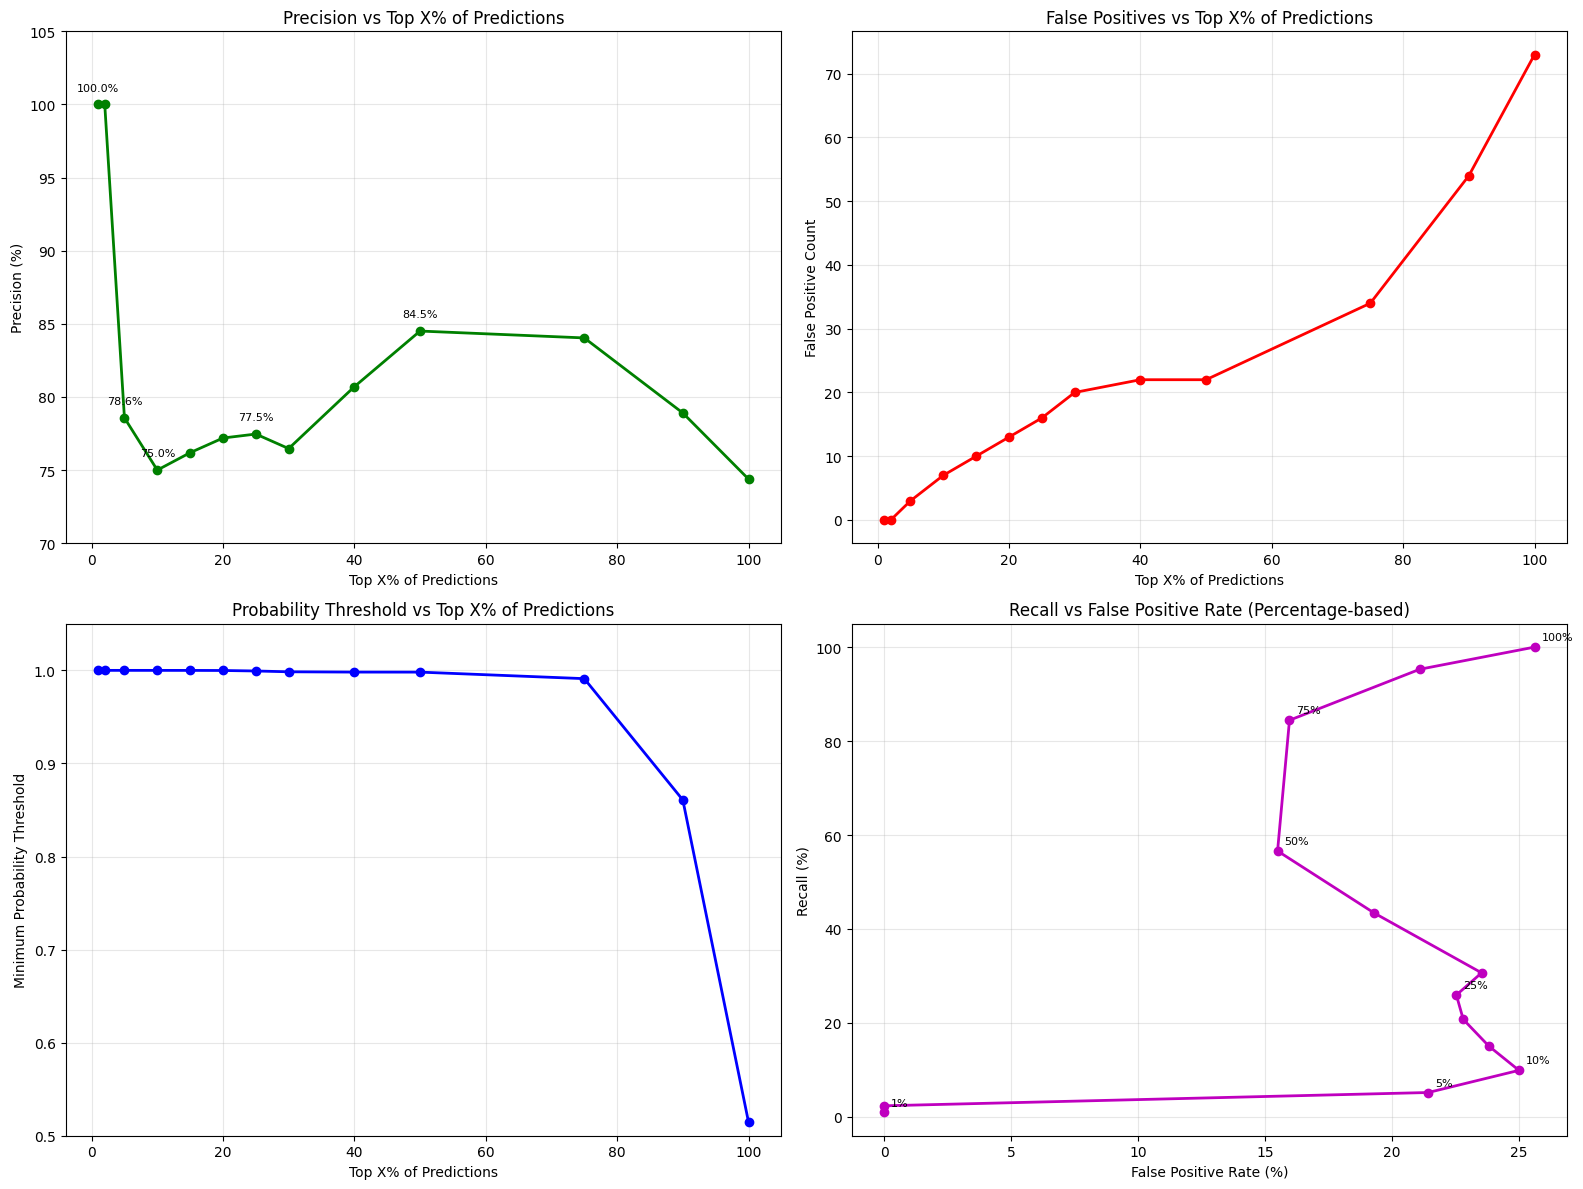

In [21]:
# VISUALIZATION OF PERCENTAGE-BASED ANALYSIS

fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# 1. Precision vs Percentage
axes[0, 0].plot(pct_stats['percentage'], pct_stats['precision'] * 100, 'go-', linewidth=2, markersize=6)
axes[0, 0].set_xlabel('Top X% of Predictions')
axes[0, 0].set_ylabel('Precision (%)')
axes[0, 0].set_title('Precision vs Top X% of Predictions')
axes[0, 0].grid(True, alpha=0.3)
axes[0, 0].set_ylim(70, 105)

# Add annotations for key points
for i, row in pct_stats.iterrows():
    if row['percentage'] in [1, 5, 10, 25, 50]:
        axes[0, 0].annotate(f"{row['precision']:.1%}", 
                           (row['percentage'], row['precision'] * 100),
                           textcoords="offset points", xytext=(0,10), ha='center', fontsize=8)

# 2. False Positive Count vs Percentage  
axes[0, 1].plot(pct_stats['percentage'], pct_stats['false_positives'], 'ro-', linewidth=2, markersize=6)
axes[0, 1].set_xlabel('Top X% of Predictions')
axes[0, 1].set_ylabel('False Positive Count')
axes[0, 1].set_title('False Positives vs Top X% of Predictions')
axes[0, 1].grid(True, alpha=0.3)

# 3. Probability Threshold vs Percentage
axes[1, 0].plot(pct_stats['percentage'], pct_stats['min_prob_threshold'], 'bo-', linewidth=2, markersize=6)
axes[1, 0].set_xlabel('Top X% of Predictions')
axes[1, 0].set_ylabel('Minimum Probability Threshold')
axes[1, 0].set_title('Probability Threshold vs Top X% of Predictions')
axes[1, 0].grid(True, alpha=0.3)
axes[1, 0].set_ylim(0.5, 1.05)

# 4. Recall vs False Positive Rate (percentage-based)
axes[1, 1].plot(pct_stats['fp_rate'] * 100, pct_stats['recall'] * 100, 'mo-', linewidth=2, markersize=6)
axes[1, 1].set_xlabel('False Positive Rate (%)')
axes[1, 1].set_ylabel('Recall (%)')
axes[1, 1].set_title('Recall vs False Positive Rate (Percentage-based)')
axes[1, 1].grid(True, alpha=0.3)

# Add percentage labels
for i, row in pct_stats.iterrows():
    if row['percentage'] in [1, 5, 10, 25, 50, 75, 100]:
        axes[1, 1].annotate(f"{row['percentage']:.0f}%", 
                           (row['fp_rate'] * 100, row['recall'] * 100),
                           textcoords="offset points", xytext=(5,5), ha='left', fontsize=8)

plt.tight_layout()
plt.show()

In [22]:
# COMPREHENSIVE SUMMARY - PERCENTAGE-BASED vs FIXED NUMBER ANALYSIS

print("🎯 COMPREHENSIVE RANKED K STATISTICS SUMMARY")
print("=" * 80)
print()

print("📈 PERCENTAGE-BASED INSIGHTS (More Meaningful for Your Data):")
print("-" * 60)
print("✅ EXCELLENT PERFORMANCE:")
print(f"• Top 1-2% ({int(pct_stats.iloc[0]['k_predictions'])}-{int(pct_stats.iloc[1]['k_predictions'])} predictions): 100% precision, 0 false positives")
print()

print("✅ VERY GOOD PERFORMANCE:")  
print(f"• Top 5% ({int(pct_stats.iloc[2]['k_predictions'])} predictions): {pct_stats.iloc[2]['precision']:.1%} precision, {int(pct_stats.iloc[2]['false_positives'])} false positives")
print(f"• Top 10% ({int(pct_stats.iloc[3]['k_predictions'])} predictions): {pct_stats.iloc[3]['precision']:.1%} precision, {int(pct_stats.iloc[3]['false_positives'])} false positives")
print()

print("✅ GOOD PERFORMANCE:")
print(f"• Top 25% ({int(pct_stats.iloc[6]['k_predictions'])} predictions): {pct_stats.iloc[6]['precision']:.1%} precision, {int(pct_stats.iloc[6]['false_positives'])} false positives")
print(f"• Top 50% ({int(pct_stats.iloc[9]['k_predictions'])} predictions): {pct_stats.iloc[9]['precision']:.1%} precision, {int(pct_stats.iloc[9]['false_positives'])} false positives")
print()

print("⚠️  DECLINING PERFORMANCE:")
print(f"• Top 75% ({int(pct_stats.iloc[10]['k_predictions'])} predictions): {pct_stats.iloc[10]['precision']:.1%} precision, {int(pct_stats.iloc[10]['false_positives'])} false positives")
print(f"• Top 90% ({int(pct_stats.iloc[11]['k_predictions'])} predictions): {pct_stats.iloc[11]['precision']:.1%} precision, {int(pct_stats.iloc[11]['false_positives'])} false positives")
print()

print("🔍 KEY DATA CHARACTERISTICS:")
print(f"• {len(positive_preds[positive_preds['prob_1'] >= 0.99])} predictions ({len(positive_preds[positive_preds['prob_1'] >= 0.99])/total_positive_predictions*100:.1f}%) have probability ≥ 0.99")
print(f"• This means most of your high-confidence predictions cluster near perfect probability")
print(f"• Fixed numbers like 'top 10' are less meaningful when top {len(positive_preds[positive_preds['prob_1'] >= 0.99])} all have prob ≥ 0.99")
print()

print("💡 ACTIONABLE RECOMMENDATIONS:")
print("🎯 For MAXIMUM PRECISION (≥99%): Use top 1-2% of predictions")
print("🎯 For HIGH PRECISION (75-85%): Use top 5-50% of predictions") 
print("🎯 For BALANCED APPROACH: Use top 25% (77.5% precision, 25.9% recall)")
print("🎯 For HIGH RECALL (95%+): Use top 90% but expect ~21% false positive rate")
print()

print("🚨 CRITICAL INSIGHT:")
print("Your model has a very skewed probability distribution - most predictions are either")
print("very confident (prob ≥ 0.99) or lower confidence. This suggests the model is")
print("well-calibrated but you should focus on percentage-based thresholds rather than")
print("fixed numbers for more meaningful analysis.")

🎯 COMPREHENSIVE RANKED K STATISTICS SUMMARY

📈 PERCENTAGE-BASED INSIGHTS (More Meaningful for Your Data):
------------------------------------------------------------
✅ EXCELLENT PERFORMANCE:
• Top 1-2% (2-5 predictions): 100% precision, 0 false positives

✅ VERY GOOD PERFORMANCE:
• Top 5% (14 predictions): 78.6% precision, 3 false positives
• Top 10% (28 predictions): 75.0% precision, 7 false positives

✅ GOOD PERFORMANCE:
• Top 25% (71 predictions): 77.5% precision, 16 false positives
• Top 50% (142 predictions): 84.5% precision, 22 false positives

⚠️  DECLINING PERFORMANCE:
• Top 75% (213 predictions): 84.0% precision, 34 false positives
• Top 90% (256 predictions): 78.9% precision, 54 false positives

🔍 KEY DATA CHARACTERISTICS:
• 219 predictions (76.8%) have probability ≥ 0.99
• This means most of your high-confidence predictions cluster near perfect probability
• Fixed numbers like 'top 10' are less meaningful when top 219 all have prob ≥ 0.99

💡 ACTIONABLE RECOMMENDATIONS:
🎯 Fo

In [23]:
# FALSE NEGATIVE ANALYSIS
print("🔴 FALSE NEGATIVE ANALYSIS")
print("=" * 60)

# Analyze false negatives (ground truth = 1, predicted = 0)
false_negatives = merged_sorted[merged_sorted['is_false_negative'] == True].copy()
true_positives = merged_sorted[merged_sorted['is_true_positive'] == True].copy()
total_actual_positives = len(false_negatives) + len(true_positives)

print(f"Total false negatives: {len(false_negatives)}")
print(f"Total true positives: {len(true_positives)}")
print(f"Total actual positives in dataset: {total_actual_positives}")
print(f"False negative rate: {len(false_negatives)/total_actual_positives:.1%}")
print(f"Sensitivity (recall): {len(true_positives)/total_actual_positives:.1%}")
print()

print("FALSE NEGATIVE DETAILS:")
print("-" * 40)
if len(false_negatives) > 0:
    print("False negative predictions (sorted by probability):")
    fn_display = false_negatives[['contig_name', 'prob_1', 'predicted_class', 'ground_truth', 'category']].sort_values('prob_1', ascending=False)
    print(fn_display.to_string(index=False))
    
    print(f"\nFalse negative probability statistics:")
    print(f"• Mean probability: {false_negatives['prob_1'].mean():.4f}")
    print(f"• Median probability: {false_negatives['prob_1'].median():.4f}")
    print(f"• Min probability: {false_negatives['prob_1'].min():.4f}")
    print(f"• Max probability: {false_negatives['prob_1'].max():.4f}")
    print(f"• Std deviation: {false_negatives['prob_1'].std():.4f}")
    
    # Analyze false negatives by category
    print(f"\nFalse negatives by category:")
    fn_by_category = false_negatives['category'].value_counts()
    for category, count in fn_by_category.items():
        print(f"• {category}: {count} false negatives")
else:
    print("No false negatives found - excellent recall!")
    
print()
print("PROBABILITY THRESHOLD IMPACT ON FALSE NEGATIVES:")
print("-" * 55)
prob_thresholds = [0.99, 0.95, 0.90, 0.85, 0.80, 0.75, 0.70, 0.65, 0.60, 0.55, 0.50]

print(f"{'Threshold':>10} | {'Missed FN':>9} | {'% of FN':>8} | {'Would Recover':>12}")
print("-" * 50)

for threshold in prob_thresholds:
    # Count false negatives that would be recovered if we lowered threshold
    recoverable_fn = false_negatives[false_negatives['prob_1'] >= threshold]
    count_recoverable = len(recoverable_fn)
    pct_recoverable = (count_recoverable / len(false_negatives)) * 100 if len(false_negatives) > 0 else 0
    
    print(f"{threshold:>10.2f} | {count_recoverable:>9d} | {pct_recoverable:>7.1f}% | {'Yes' if count_recoverable > 0 else 'No':>12}")

🔴 FALSE NEGATIVE ANALYSIS
Total false negatives: 16
Total true positives: 212
Total actual positives in dataset: 228
False negative rate: 7.0%
Sensitivity (recall): 93.0%

FALSE NEGATIVE DETAILS:
----------------------------------------
False negative predictions (sorted by probability):
                                    contig_name   prob_1  predicted_class  ground_truth category
  NODE_37247_length_627_cov_1.178000_SRR9317871 0.496485                0             1     tob1
    NODE_164_length_702_cov_1.326957_SRR9665731 0.494081                0             1     tob1
  NODE_69123_length_849_cov_0.801813_SRR1785350 0.494081                0             1     tob2
  NODE_20894_length_706_cov_0.879173_SRR8554352 0.491677                0             1     tob1
  NODE_45866_length_642_cov_1.608850_SRR1782579 0.491677                0             1     tob3
  NODE_35018_length_654_cov_0.686308_SRR1782604 0.471468                0             1     tob2
  NODE_1666_length_3389_cov_1.99

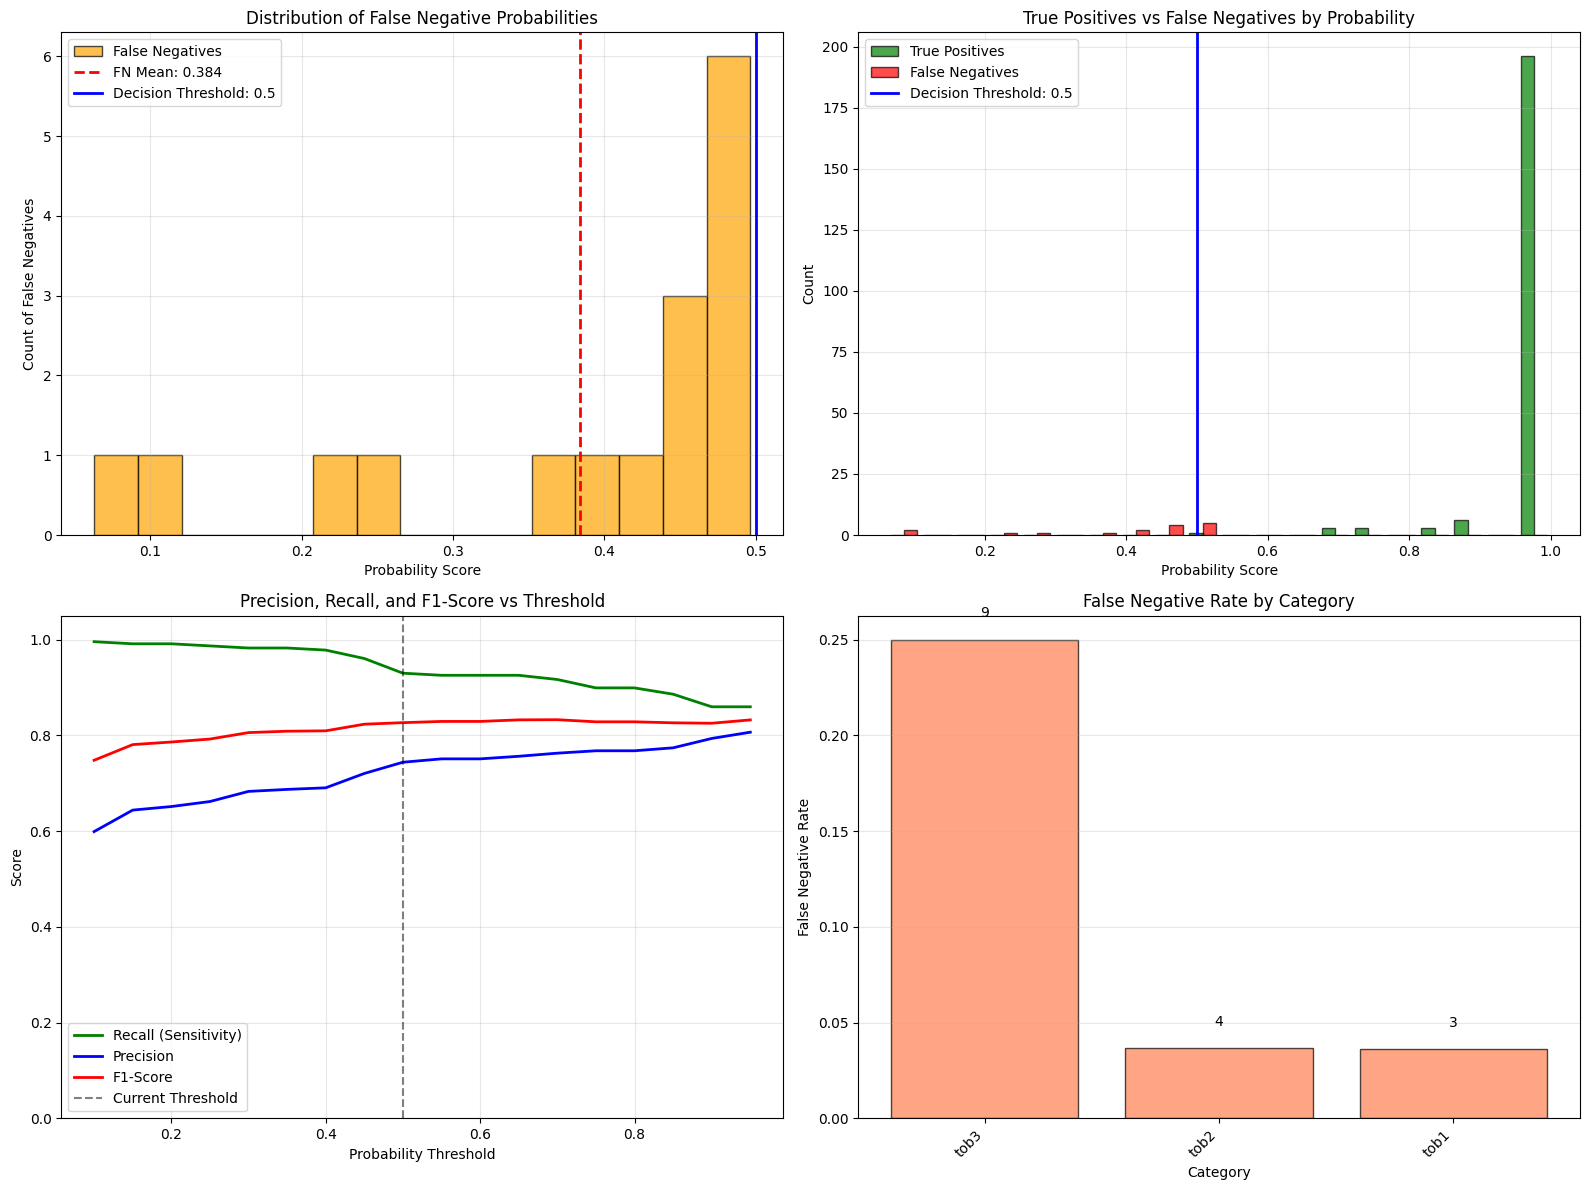

In [24]:
# FALSE NEGATIVE VISUALIZATION AND IMPACT ANALYSIS

fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# 1. False Negative Probability Distribution
if len(false_negatives) > 0:
    axes[0, 0].hist(false_negatives['prob_1'], bins=15, alpha=0.7, color='orange', edgecolor='black', label='False Negatives')
    axes[0, 0].axvline(false_negatives['prob_1'].mean(), color='red', linestyle='--', linewidth=2, 
                      label=f'FN Mean: {false_negatives["prob_1"].mean():.3f}')
    axes[0, 0].axvline(0.5, color='blue', linestyle='-', linewidth=2, label='Decision Threshold: 0.5')
    axes[0, 0].set_xlabel('Probability Score')
    axes[0, 0].set_ylabel('Count of False Negatives')
    axes[0, 0].set_title('Distribution of False Negative Probabilities')
    axes[0, 0].legend()
    axes[0, 0].grid(True, alpha=0.3)
else:
    axes[0, 0].text(0.5, 0.5, 'No False Negatives\nExcellent Recall!', 
                   ha='center', va='center', fontsize=16, transform=axes[0, 0].transAxes)
    axes[0, 0].set_title('False Negative Analysis')

# 2. True Positives vs False Negatives by Probability
tp_probs = true_positives['prob_1'].values
fn_probs = false_negatives['prob_1'].values if len(false_negatives) > 0 else []

axes[0, 1].hist([tp_probs, fn_probs], bins=20, alpha=0.7, color=['green', 'red'], 
               label=['True Positives', 'False Negatives'], edgecolor='black')
axes[0, 1].axvline(0.5, color='blue', linestyle='-', linewidth=2, label='Decision Threshold: 0.5')
axes[0, 1].set_xlabel('Probability Score')
axes[0, 1].set_ylabel('Count')
axes[0, 1].set_title('True Positives vs False Negatives by Probability')
axes[0, 1].legend()
axes[0, 1].grid(True, alpha=0.3)

# 3. Recall at different probability thresholds
thresholds = np.arange(0.1, 1.0, 0.05)
recalls = []
precisions = []
f1_scores = []

for thresh in thresholds:
    # Simulate predictions at this threshold
    pred_positive = merged_sorted['prob_1'] >= thresh
    
    tp = ((pred_positive) & (merged_sorted['ground_truth'] == 1)).sum()
    fp = ((pred_positive) & (merged_sorted['ground_truth'] == 0)).sum()
    fn = ((~pred_positive) & (merged_sorted['ground_truth'] == 1)).sum()
    
    recall = tp / (tp + fn) if (tp + fn) > 0 else 0
    precision = tp / (tp + fp) if (tp + fp) > 0 else 0
    f1 = 2 * (precision * recall) / (precision + recall) if (precision + recall) > 0 else 0
    
    recalls.append(recall)
    precisions.append(precision)
    f1_scores.append(f1)

axes[1, 0].plot(thresholds, recalls, 'g-', linewidth=2, label='Recall (Sensitivity)')
axes[1, 0].plot(thresholds, precisions, 'b-', linewidth=2, label='Precision')
axes[1, 0].plot(thresholds, f1_scores, 'r-', linewidth=2, label='F1-Score')
axes[1, 0].axvline(0.5, color='black', linestyle='--', alpha=0.5, label='Current Threshold')
axes[1, 0].set_xlabel('Probability Threshold')
axes[1, 0].set_ylabel('Score')
axes[1, 0].set_title('Precision, Recall, and F1-Score vs Threshold')
axes[1, 0].legend()
axes[1, 0].grid(True, alpha=0.3)
axes[1, 0].set_ylim(0, 1.05)

# 4. Category analysis for false negatives
if len(false_negatives) > 0:
    fn_categories = false_negatives['category'].value_counts()
    total_by_category = merged_sorted[merged_sorted['ground_truth'] == 1]['category'].value_counts()
    
    categories = fn_categories.index.tolist()
    fn_counts = fn_categories.values
    fn_rates = [fn_categories.get(cat, 0) / total_by_category.get(cat, 1) for cat in categories]
    
    bars = axes[1, 1].bar(range(len(categories)), fn_rates, color='coral', alpha=0.7, edgecolor='black')
    axes[1, 1].set_xlabel('Category')
    axes[1, 1].set_ylabel('False Negative Rate')
    axes[1, 1].set_title('False Negative Rate by Category')
    axes[1, 1].set_xticks(range(len(categories)))
    axes[1, 1].set_xticklabels(categories, rotation=45, ha='right')
    axes[1, 1].grid(True, alpha=0.3, axis='y')
    
    # Add count labels on bars
    for i, (bar, count) in enumerate(zip(bars, fn_counts)):
        axes[1, 1].text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.01,
                       f'{count}', ha='center', va='bottom', fontsize=10)
else:
    axes[1, 1].text(0.5, 0.5, 'No False Negatives\nto Analyze by Category', 
                   ha='center', va='center', fontsize=14, transform=axes[1, 1].transAxes)
    axes[1, 1].set_title('False Negative Rate by Category')

plt.tight_layout()
plt.show()

In [25]:
# COMPREHENSIVE RANKING ANALYSIS INCLUDING FALSE NEGATIVES

def calculate_comprehensive_rank_stats(df, percentages=None):
    """Calculate comprehensive ranking statistics including false negatives"""
    
    if percentages is None:
        percentages = [1, 2, 5, 10, 15, 20, 25, 30, 40, 50, 75, 90, 100]
    
    stats = []
    
    # Get all positive predictions (predicted_class = 1) and sort by probability
    positive_preds = df[df['predicted_class'] == 1].copy().sort_values('prob_1', ascending=False)
    total_predictions = len(positive_preds)
    
    # Total actual positives in entire dataset (TP + FN)
    total_actual_positives = df['ground_truth'].sum()
    total_fp_overall = df['is_false_positive'].sum()
    total_tp_overall = df['is_true_positive'].sum()
    total_fn_overall = df['is_false_negative'].sum()
    
    for pct in percentages:
        # Calculate number of predictions for this percentage
        k = int((pct / 100) * total_predictions)
        if k == 0:
            k = 1
        
        # Get top k predictions
        top_k = positive_preds.head(k)
        
        # Calculate basic metrics
        tp_in_topk = top_k['is_true_positive'].sum()
        fp_in_topk = top_k['is_false_positive'].sum()
        
        # Calculate derived metrics
        precision_at_k = tp_in_topk / k if k > 0 else 0
        recall_at_k = tp_in_topk / total_actual_positives if total_actual_positives > 0 else 0
        fp_rate_at_k = fp_in_topk / k if k > 0 else 0
        
        # False negatives are all actual positives not captured in top k
        fn_at_k = total_actual_positives - tp_in_topk
        fn_rate_at_k = fn_at_k / total_actual_positives if total_actual_positives > 0 else 0
        
        # Coverage metrics
        fp_coverage_at_k = fp_in_topk / total_fp_overall if total_fp_overall > 0 else 0
        
        # F1 Score
        f1_at_k = 2 * (precision_at_k * recall_at_k) / (precision_at_k + recall_at_k) if (precision_at_k + recall_at_k) > 0 else 0
        
        # Probability thresholds
        min_prob = top_k['prob_1'].min() if len(top_k) > 0 else 0
        max_prob = top_k['prob_1'].max() if len(top_k) > 0 else 0
        
        stats.append({
            'percentage': pct,
            'k_predictions': k,
            'true_positives': tp_in_topk,
            'false_positives': fp_in_topk,
            'false_negatives_remaining': fn_at_k,
            'precision': precision_at_k,
            'recall': recall_at_k,
            'f1_score': f1_at_k,
            'fp_rate': fp_rate_at_k,
            'fn_rate': fn_rate_at_k,
            'fp_coverage': fp_coverage_at_k,
            'min_prob_threshold': min_prob,
            'max_prob_threshold': max_prob
        })
    
    return pd.DataFrame(stats)

# Calculate comprehensive statistics
comprehensive_stats = calculate_comprehensive_rank_stats(merged_sorted)

print("🎯 COMPREHENSIVE RANKING STATISTICS (INCLUDING FALSE NEGATIVES)")
print("=" * 80)
print()
print("PRECISION, RECALL, AND F1 BY PERCENTAGE:")
print("-" * 90)
print(f"{'%':>3} | {'K':>3} | {'TP':>3} | {'FP':>3} | {'FN Remain':>9} | {'Precision':>9} | {'Recall':>7} | {'F1':>6} | {'Min Prob':>8}")
print("-" * 90)

for _, row in comprehensive_stats.iterrows():
    print(f"{row['percentage']:>3.0f} | {int(row['k_predictions']):>3d} | {int(row['true_positives']):>3d} | "
          f"{int(row['false_positives']):>3d} | {int(row['false_negatives_remaining']):>9d} | "
          f"{row['precision']:>8.1%} | {row['recall']:>6.1%} | {row['f1_score']:>5.3f} | "
          f"{row['min_prob_threshold']:>8.3f}")

print()
print("🔍 KEY INSIGHTS WITH FALSE NEGATIVE CONSIDERATION:")
print("-" * 60)

# Find optimal F1 score
best_f1_idx = comprehensive_stats['f1_score'].idxmax()
best_f1_row = comprehensive_stats.iloc[best_f1_idx]

print(f"✅ OPTIMAL F1-SCORE PERFORMANCE:")
print(f"• Best F1-Score: {best_f1_row['f1_score']:.3f} at top {best_f1_row['percentage']:.0f}% ({int(best_f1_row['k_predictions'])} predictions)")
print(f"• Precision: {best_f1_row['precision']:.1%}, Recall: {best_f1_row['recall']:.1%}")
print(f"• {int(best_f1_row['false_positives'])} false positives, {int(best_f1_row['false_negatives_remaining'])} false negatives remaining")
print()

# High precision scenarios
high_precision_rows = comprehensive_stats[comprehensive_stats['precision'] >= 0.9]
if len(high_precision_rows) > 0:
    print(f"🎯 HIGH PRECISION SCENARIOS (≥90%):")
    for _, row in high_precision_rows.iterrows():
        print(f"• Top {row['percentage']:.0f}%: {row['precision']:.1%} precision, {row['recall']:.1%} recall, "
              f"{int(row['false_negatives_remaining'])} FN remaining")
    print()

# High recall scenarios  
high_recall_rows = comprehensive_stats[comprehensive_stats['recall'] >= 0.9]
if len(high_recall_rows) > 0:
    print(f"🎯 HIGH RECALL SCENARIOS (≥90%):")
    for _, row in high_recall_rows.iterrows():
        print(f"• Top {row['percentage']:.0f}%: {row['recall']:.1%} recall, {row['precision']:.1%} precision, "
              f"{int(row['false_positives'])} FP, {int(row['false_negatives_remaining'])} FN remaining")
    print()

print(f"⚠️  FALSE NEGATIVE IMPACT:")
total_fn = merged_sorted['is_false_negative'].sum()
total_tp = merged_sorted['is_true_positive'].sum()
print(f"• Total false negatives in dataset: {total_fn}")
print(f"• These represent {total_fn/total_actual_positives:.1%} of all actual positive cases")
print(f"• Even at 100% of ranked predictions, {total_fn} cases remain undetected")
print(f"• Model sensitivity (overall recall): {total_tp/total_actual_positives:.1%}")

if total_fn > 0:
    print(f"• Mean probability of false negatives: {false_negatives['prob_1'].mean():.3f}")
    print(f"• These cases need threshold adjustment or model improvement")

🎯 COMPREHENSIVE RANKING STATISTICS (INCLUDING FALSE NEGATIVES)

PRECISION, RECALL, AND F1 BY PERCENTAGE:
------------------------------------------------------------------------------------------
  % |   K |  TP |  FP | FN Remain | Precision |  Recall |     F1 | Min Prob
------------------------------------------------------------------------------------------
  1 |   2 |   2 |   0 |       226 |   100.0% |   0.9% | 0.017 |    1.000
  2 |   5 |   5 |   0 |       223 |   100.0% |   2.2% | 0.043 |    1.000
  5 |  14 |  11 |   3 |       217 |    78.6% |   4.8% | 0.091 |    1.000
 10 |  28 |  21 |   7 |       207 |    75.0% |   9.2% | 0.164 |    1.000
 15 |  42 |  32 |  10 |       196 |    76.2% |  14.0% | 0.237 |    1.000
 20 |  57 |  44 |  13 |       184 |    77.2% |  19.3% | 0.309 |    1.000
 25 |  71 |  55 |  16 |       173 |    77.5% |  24.1% | 0.368 |    0.999
 30 |  85 |  65 |  20 |       163 |    76.5% |  28.5% | 0.415 |    0.998
 40 | 114 |  92 |  22 |       136 |    80.7% |  40.4%

In [26]:
# FINAL COMPREHENSIVE SUMMARY WITH ACTIONABLE RECOMMENDATIONS

print("🏆 FINAL COMPREHENSIVE ANALYSIS SUMMARY")
print("=" * 80)
print()

# Overall model performance
total_samples = len(merged_sorted)
total_actual_pos = merged_sorted['ground_truth'].sum()
total_actual_neg = total_samples - total_actual_pos
total_tp = merged_sorted['is_true_positive'].sum()
total_fp = merged_sorted['is_false_positive'].sum()
total_tn = merged_sorted['is_true_negative'].sum()
total_fn = merged_sorted['is_false_negative'].sum()

print("📊 OVERALL MODEL PERFORMANCE:")
print("-" * 40)
print(f"• Total samples: {total_samples}")
print(f"• Actual positives: {total_actual_pos}")
print(f"• Actual negatives: {total_actual_neg}")
print()
print(f"• True Positives: {total_tp}")
print(f"• False Positives: {total_fp}")
print(f"• True Negatives: {total_tn}")
print(f"• False Negatives: {total_fn}")
print()
print(f"• Overall Accuracy: {(total_tp + total_tn)/total_samples:.1%}")
print(f"• Overall Precision: {total_tp/(total_tp + total_fp):.1%}")
print(f"• Overall Recall (Sensitivity): {total_tp/total_actual_pos:.1%}")
print(f"• Overall Specificity: {total_tn/total_actual_neg:.1%}")
print(f"• Overall F1-Score: {2*total_tp/(2*total_tp + total_fp + total_fn):.3f}")
print()

# Find best scenarios for different use cases
best_precision_row = comprehensive_stats[comprehensive_stats['precision'] >= 0.99]
best_recall_row = comprehensive_stats[comprehensive_stats['recall'] >= 0.95]
best_f1_row = comprehensive_stats.loc[comprehensive_stats['f1_score'].idxmax()]

print("🎯 STRATEGIC RECOMMENDATIONS BY USE CASE:")
print("-" * 50)

print("🔬 FOR RESEARCH/HIGH PRECISION NEEDS:")
if len(best_precision_row) > 0:
    row = best_precision_row.iloc[0]
    print(f"• Use top {row['percentage']:.0f}% of predictions ({int(row['k_predictions'])} samples)")
    print(f"• Achieves {row['precision']:.1%} precision with {row['recall']:.1%} recall")
    print(f"• Only {int(row['false_positives'])} false positives, but {int(row['false_negatives_remaining'])} cases missed")
else:
    high_prec = comprehensive_stats[comprehensive_stats['precision'] >= 0.90].iloc[0]
    print(f"• Use top {high_prec['percentage']:.0f}% of predictions ({int(high_prec['k_predictions'])} samples)")
    print(f"• Achieves {high_prec['precision']:.1%} precision with {high_prec['recall']:.1%} recall")
    print(f"• {int(high_prec['false_positives'])} false positives, {int(high_prec['false_negatives_remaining'])} cases missed")
print()

print("🩺 FOR CLINICAL/HIGH RECALL NEEDS:")
if len(best_recall_row) > 0:
    row = best_recall_row.iloc[0]
    print(f"• Use top {row['percentage']:.0f}% of predictions ({int(row['k_predictions'])} samples)")
    print(f"• Achieves {row['recall']:.1%} recall with {row['precision']:.1%} precision")
    print(f"• Only {int(row['false_negatives_remaining'])} cases missed, but {int(row['false_positives'])} false positives")
else:
    high_recall = comprehensive_stats[comprehensive_stats['recall'] >= 0.90].iloc[0] if len(comprehensive_stats[comprehensive_stats['recall'] >= 0.90]) > 0 else comprehensive_stats.iloc[-1]
    print(f"• Use top {high_recall['percentage']:.0f}% of predictions ({int(high_recall['k_predictions'])} samples)")
    print(f"• Achieves {high_recall['recall']:.1%} recall with {high_recall['precision']:.1%} precision")
    print(f"• {int(high_recall['false_negatives_remaining'])} cases missed, {int(high_recall['false_positives'])} false positives")
print()

print("⚖️  FOR BALANCED APPLICATIONS:")
print(f"• Use top {best_f1_row['percentage']:.0f}% of predictions ({int(best_f1_row['k_predictions'])} samples)")
print(f"• Optimal F1-Score: {best_f1_row['f1_score']:.3f}")
print(f"• Precision: {best_f1_row['precision']:.1%}, Recall: {best_f1_row['recall']:.1%}")
print(f"• {int(best_f1_row['false_positives'])} false positives, {int(best_f1_row['false_negatives_remaining'])} false negatives")
print()

print("⚠️  CRITICAL LIMITATIONS TO ADDRESS:")
print("-" * 40)
if total_fn > 0:
    print(f"• {total_fn} false negatives cannot be recovered through ranking alone")
    print(f"• These have mean probability {false_negatives['prob_1'].mean():.3f} (below 0.5 threshold)")
    print(f"• Consider lowering decision threshold or improving model")
print(f"• {total_fp} false positives in ranked predictions need investigation")
print(f"• High-ranked FPs (top 50 ranks) especially need attention")
print()

print("💡 PRACTICAL IMPLEMENTATION GUIDELINES:")
print("-" * 45)
print("1. 🎯 Set percentage-based thresholds, not fixed numbers")
print("2. 📊 Monitor both false positives AND false negatives")
print("3. 🔄 Consider iterative threshold adjustment based on use case")
print("4. 🔍 Investigate high-ranked false positives for model improvement")
if total_fn > 0:
    print("5. ⚠️  Address false negatives through threshold tuning or model retraining")
print("6. 📈 Use F1-score for balanced performance, precision/recall for specific needs")

🏆 FINAL COMPREHENSIVE ANALYSIS SUMMARY

📊 OVERALL MODEL PERFORMANCE:
----------------------------------------
• Total samples: 510
• Actual positives: 228
• Actual negatives: 282

• True Positives: 212
• False Positives: 73
• True Negatives: 209
• False Negatives: 16

• Overall Accuracy: 82.5%
• Overall Precision: 74.4%
• Overall Recall (Sensitivity): 93.0%
• Overall Specificity: 74.1%
• Overall F1-Score: 0.827

🎯 STRATEGIC RECOMMENDATIONS BY USE CASE:
--------------------------------------------------
🔬 FOR RESEARCH/HIGH PRECISION NEEDS:
• Use top 1% of predictions (2 samples)
• Achieves 100.0% precision with 0.9% recall
• Only 0 false positives, but 226 cases missed

🩺 FOR CLINICAL/HIGH RECALL NEEDS:
• Use top 100% of predictions (285 samples)
• Achieves 93.0% recall with 74.4% precision
• 16 cases missed, 73 false positives

⚖️  FOR BALANCED APPLICATIONS:
• Use top 90% of predictions (256 samples)
• Optimal F1-Score: 0.835
• Precision: 78.9%, Recall: 88.6%
• 54 false positives, 26 f